# Telco Customer Churn Dataset - Complete Data Analysis

This notebook performs comprehensive data cleaning, preprocessing, and exploratory data analysis on the Telco Customer Churn dataset from Kaggle.

## Table of Contents
1. **Data Loading and Initial Setup**
2. **Data Overview and Structure**
3. **Data Quality Assessment**
4. **Data Cleaning and Preprocessing**
5. **Exploratory Data Analysis (EDA)**
6. **Feature Engineering**
7. **Statistical Analysis**
8. **Advanced Analysis and Insights**
9. **Key Insights and Business Recommendations**
10. **PCA and Lasso**
11. **Kernel PCA**

## 1. Data Loading and Initial Setup

In [1]:
%pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn
%pip install kagglehub
%pip install "plotly>=5.0.0" "kaleido>=0.1.0"


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import kagglehub
import random

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set pandas options for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

print(f"Libraries imported successfully! Random seed set to {RANDOM_SEED} for reproducibility.")

Libraries imported successfully! Random seed set to 42 for reproducibility.


/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download dataset from Kaggle
print("Downloading Telco Customer Churn dataset...")
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

# Load the dataset
df = pd.read_csv(f'{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f"Dataset loaded successfully! Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Save raw data
df.to_csv("telco_raw_data.csv", index=False)
print("Saved telco_raw_data.csv successfully.")

Path to dataset files: /Users/shreyasshah/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1
Dataset loaded successfully! Shape: (7043, 21)
Memory usage: 7.79 MB
Saved telco_raw_data.csv successfully.


## 2. Data Overview and Structure

In [4]:
# Display basic information about the dataset
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print("\n" + "="*50)
print("COLUMN INFORMATION")
print("="*50)
print(df.info())
print("\n" + "="*50)
print("FIRST 5 ROWS")
print("="*50)
df.head()

DATASET OVERVIEW
Dataset Shape: (7043, 21)
Number of rows: 7,043
Number of columns: 21

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-nu

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Display column names and data types
print("COLUMN DETAILS:")
print("-" * 60)
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2d}. {col:<25} | {str(dtype):<10} | Unique: {df[col].nunique()}")

print(f"\nTOTAL FEATURES: {len(df.columns)}")
print(f"CATEGORICAL FEATURES: {len(df.select_dtypes(include=['object']).columns)}")
print(f"NUMERICAL FEATURES: {len(df.select_dtypes(include=['int64', 'float64']).columns)}")

COLUMN DETAILS:
------------------------------------------------------------
 1. customerID                | object     | Unique: 7043
 2. gender                    | object     | Unique: 2
 3. SeniorCitizen             | int64      | Unique: 2
 4. Partner                   | object     | Unique: 2
 5. Dependents                | object     | Unique: 2
 6. tenure                    | int64      | Unique: 73
 7. PhoneService              | object     | Unique: 2
 8. MultipleLines             | object     | Unique: 3
 9. InternetService           | object     | Unique: 3
10. OnlineSecurity            | object     | Unique: 3
11. OnlineBackup              | object     | Unique: 3
12. DeviceProtection          | object     | Unique: 3
13. TechSupport               | object     | Unique: 3
14. StreamingTV               | object     | Unique: 3
15. StreamingMovies           | object     | Unique: 3
16. Contract                  | object     | Unique: 3
17. PaperlessBilling          | object 

In [6]:
# Statistical summary for numerical columns
print("STATISTICAL SUMMARY - NUMERICAL FEATURES:")
print("="*80)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].describe().round(2)

STATISTICAL SUMMARY - NUMERICAL FEATURES:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


## 3. Data Quality Assessment

In [7]:
# Check for missing values
print("MISSING VALUES ANALYSIS:")
print("="*50)
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})

missing_df = missing_df.sort_values('Missing Count', ascending=False)
print(missing_df.to_string(index=False))

total_missing = missing_data.sum()
print(f"\nTOTAL MISSING VALUES: {total_missing}")
print(f"PERCENTAGE OF TOTAL DATA MISSING: {(total_missing / (len(df) * len(df.columns))) * 100:.4f}%")

MISSING VALUES ANALYSIS:
          Column  Missing Count  Missing Percentage
      customerID              0                 0.0
DeviceProtection              0                 0.0
    TotalCharges              0                 0.0
  MonthlyCharges              0                 0.0
   PaymentMethod              0                 0.0
PaperlessBilling              0                 0.0
        Contract              0                 0.0
 StreamingMovies              0                 0.0
     StreamingTV              0                 0.0
     TechSupport              0                 0.0
    OnlineBackup              0                 0.0
          gender              0                 0.0
  OnlineSecurity              0                 0.0
 InternetService              0                 0.0
   MultipleLines              0                 0.0
    PhoneService              0                 0.0
          tenure              0                 0.0
      Dependents              0        

In [8]:
# Check for duplicate rows
print("DUPLICATE DATA ANALYSIS:")
print("="*50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicate rows: {(duplicates / len(df)) * 100:.4f}%")

# Check for duplicate customer IDs
if 'customerID' in df.columns:
    duplicate_ids = df['customerID'].duplicated().sum()
    print(f"Duplicate customer IDs: {duplicate_ids}")
    
print(f"\nDataset has {len(df)} total rows")
print(f"Unique rows: {len(df) - duplicates}")

DUPLICATE DATA ANALYSIS:
Number of duplicate rows: 0
Percentage of duplicate rows: 0.0000%
Duplicate customer IDs: 0

Dataset has 7043 total rows
Unique rows: 7043


In [9]:
# Check unique values for categorical columns
print("CATEGORICAL COLUMNS UNIQUE VALUES:")
print("="*80)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"\n{col}:")
    print(f"  Unique count: {len(unique_vals)}")
    if len(unique_vals) <= 20:  # Only show if reasonable number
        print(f"  Values: {list(unique_vals)}")
    else:
        print(f"  Sample values: {list(unique_vals[:10])}...")
    
    # Check for potential data quality issues
    if df[col].dtype == 'object':
        # Check for whitespace issues
        has_whitespace = df[col].str.strip().ne(df[col]).any()
        if has_whitespace:
            print(f"Contains leading/trailing whitespace")
        
        # Check for mixed case
        if len(unique_vals) > 1:
            lower_vals = set(str(v).lower() for v in unique_vals if pd.notna(v))
            if len(lower_vals) < len([v for v in unique_vals if pd.notna(v)]):
                print(f"Contains mixed case values")

CATEGORICAL COLUMNS UNIQUE VALUES:

customerID:
  Unique count: 7043
  Sample values: ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU']...

gender:
  Unique count: 2
  Values: ['Female', 'Male']

Partner:
  Unique count: 2
  Values: ['Yes', 'No']

Dependents:
  Unique count: 2
  Values: ['No', 'Yes']

PhoneService:
  Unique count: 2
  Values: ['No', 'Yes']

MultipleLines:
  Unique count: 3
  Values: ['No phone service', 'No', 'Yes']

InternetService:
  Unique count: 3
  Values: ['DSL', 'Fiber optic', 'No']

OnlineSecurity:
  Unique count: 3
  Values: ['No', 'Yes', 'No internet service']

OnlineBackup:
  Unique count: 3
  Values: ['Yes', 'No', 'No internet service']

DeviceProtection:
  Unique count: 3
  Values: ['No', 'Yes', 'No internet service']

TechSupport:
  Unique count: 3
  Values: ['No', 'Yes', 'No internet service']

StreamingTV:
  Unique count: 3
  Values: ['No', 'Yes', 'No internet ser

## 4. Data Cleaning and Preprocessing

In [10]:
# Create a copy for cleaning
df_clean = df.copy()
print("Starting data cleaning process...")
print(f"Original dataset shape: {df.shape}")

# Handle the TotalCharges column
print("\nFixing TotalCharges column...")
if 'TotalCharges' in df_clean.columns:
    # Check if TotalCharges is object type (should be numeric)
    if df_clean['TotalCharges'].dtype == 'object':
        print("   TotalCharges is object type, converting to numeric...")
        
        # Check for non-numeric values
        non_numeric = df_clean[df_clean['TotalCharges'].str.strip() == ' ']
        print(f"   Found {len(non_numeric)} rows with empty TotalCharges")
        
        # Replace empty strings with NaN
        df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', np.nan)
        
        # Convert to numeric
        df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])
        print(f"   TotalCharges converted to numeric. Missing values: {df_clean['TotalCharges'].isnull().sum()}")

# Handle missing values
print("\nHandling missing values...")
missing_before = df_clean.isnull().sum().sum()
print(f"   Missing values before cleaning: {missing_before}")

# For TotalCharges missing values, we can estimate based on MonthlyCharges and tenure
if 'TotalCharges' in df_clean.columns and df_clean['TotalCharges'].isnull().any():
    missing_total_charges = df_clean['TotalCharges'].isnull()
    if 'MonthlyCharges' in df_clean.columns and 'tenure' in df_clean.columns:
        # For customers with 0 tenure, TotalCharges should be 0
        zero_tenure_mask = (df_clean['tenure'] == 0) & missing_total_charges
        df_clean.loc[zero_tenure_mask, 'TotalCharges'] = 0
        print(f"   Set TotalCharges to 0 for {zero_tenure_mask.sum()} customers with 0 tenure")
        
        # For others, estimate as MonthlyCharges * tenure
        remaining_missing = df_clean['TotalCharges'].isnull()
        if remaining_missing.any():
            df_clean.loc[remaining_missing, 'TotalCharges'] = (
                df_clean.loc[remaining_missing, 'MonthlyCharges'] * 
                df_clean.loc[remaining_missing, 'tenure']
            )
            print(f"   Estimated TotalCharges for {remaining_missing.sum()} customers")

missing_after = df_clean.isnull().sum().sum()
print(f"   Missing values after cleaning: {missing_after}")

print(f"\nCleaned dataset shape: {df_clean.shape}")
print("Data cleaning completed")

Starting data cleaning process...
Original dataset shape: (7043, 21)

Fixing TotalCharges column...
   TotalCharges is object type, converting to numeric...
   Found 0 rows with empty TotalCharges
   TotalCharges converted to numeric. Missing values: 11

Handling missing values...
   Missing values before cleaning: 11
   Set TotalCharges to 0 for 11 customers with 0 tenure
   Missing values after cleaning: 0

Cleaned dataset shape: (7043, 21)
Data cleaning completed


In [11]:
# Data preprocessing and feature categorization
print("FEATURE CATEGORIZATION:")
print("="*50)

# Identify feature types
customer_info = ['customerID']
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
account_info = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
charges = ['MonthlyCharges', 'TotalCharges']
target = ['Churn']

print(f"Customer Info: {customer_info}")
print(f"Demographics: {demographic_features}")
print(f"Account Info: {account_info}")
print(f"Services: {services}")
print(f"Charges: {charges}")
print(f"Target Variable: {target}")

# Create feature groups dictionary
feature_groups = {
    'customer_info': customer_info,
    'demographics': demographic_features,
    'account_info': account_info,
    'services': services,
    'charges': charges,
    'target': target
}

# Verify all columns are categorized
all_categorized = []
for group in feature_groups.values():
    all_categorized.extend(group)

missing_cols = set(df_clean.columns) - set(all_categorized)
if missing_cols:
    print(f"\nUncategorized columns: {missing_cols}")
else:
    print(f"\nAll {len(df_clean.columns)} columns successfully categorized")

FEATURE CATEGORIZATION:
Customer Info: ['customerID']
Demographics: ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
Account Info: ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Services: ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Charges: ['MonthlyCharges', 'TotalCharges']
Target Variable: ['Churn']

All 21 columns successfully categorized


## 5. Exploratory Data Analysis (EDA)

### 5.1 Target Variable Analysis

TARGET VARIABLE ANALYSIS - CHURN
Churn Distribution:
  No: 5,174 (73.46%)
  Yes: 1,869 (26.54%)

Churn Rate: 26.54%
Customer Retention Rate: 73.46%


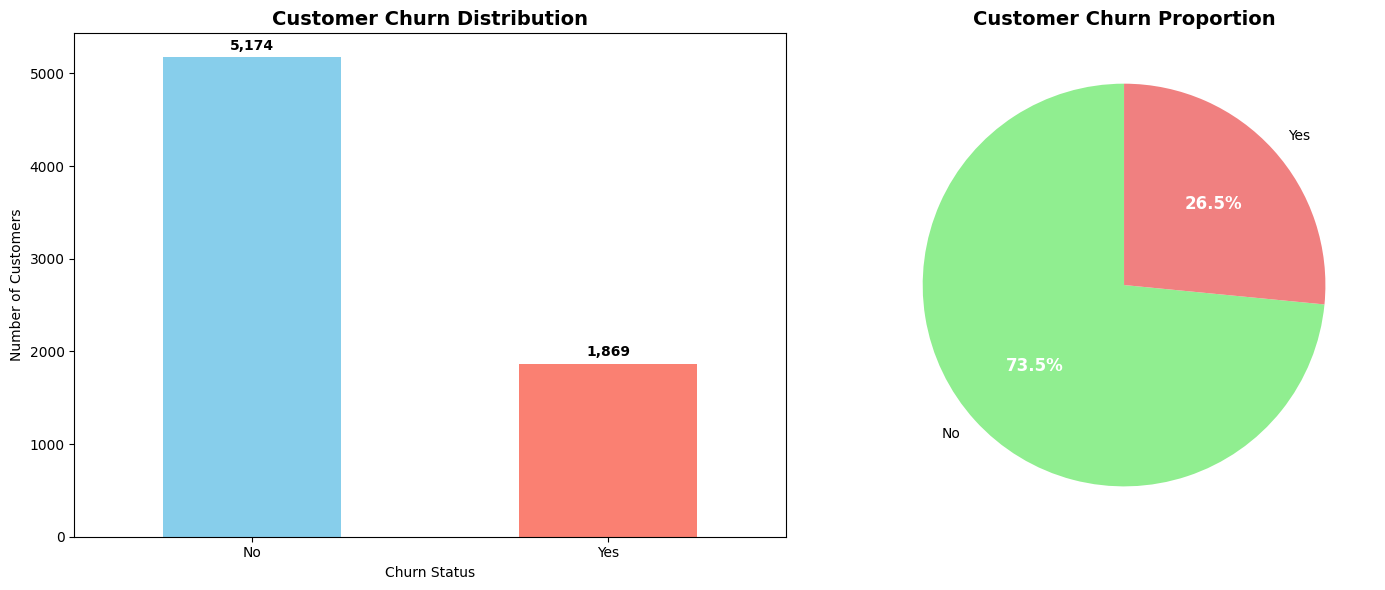

In [12]:
# Analyze target variable (Churn)
print("TARGET VARIABLE ANALYSIS - CHURN")
print("="*50)

churn_counts = df_clean['Churn'].value_counts()
churn_props = df_clean['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
for category, count in churn_counts.items():
    percentage = churn_props[category]
    print(f"  {category}: {count:,} ({percentage:.2f}%)")

print(f"\nChurn Rate: {churn_props['Yes']:.2f}%")
print(f"Customer Retention Rate: {churn_props['No']:.2f}%")

# Visualize churn distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
churn_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Churn Status')
ax1.set_ylabel('Number of Customers')
ax1.tick_params(axis='x', rotation=0)

# Add value labels on bars
for i, v in enumerate(churn_counts.values):
    ax1.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['lightgreen', 'lightcoral']
wedges, texts, autotexts = ax2.pie(churn_counts.values, labels=churn_counts.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Customer Churn Proportion', fontsize=14, fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

### 5.2 Demographic Analysis

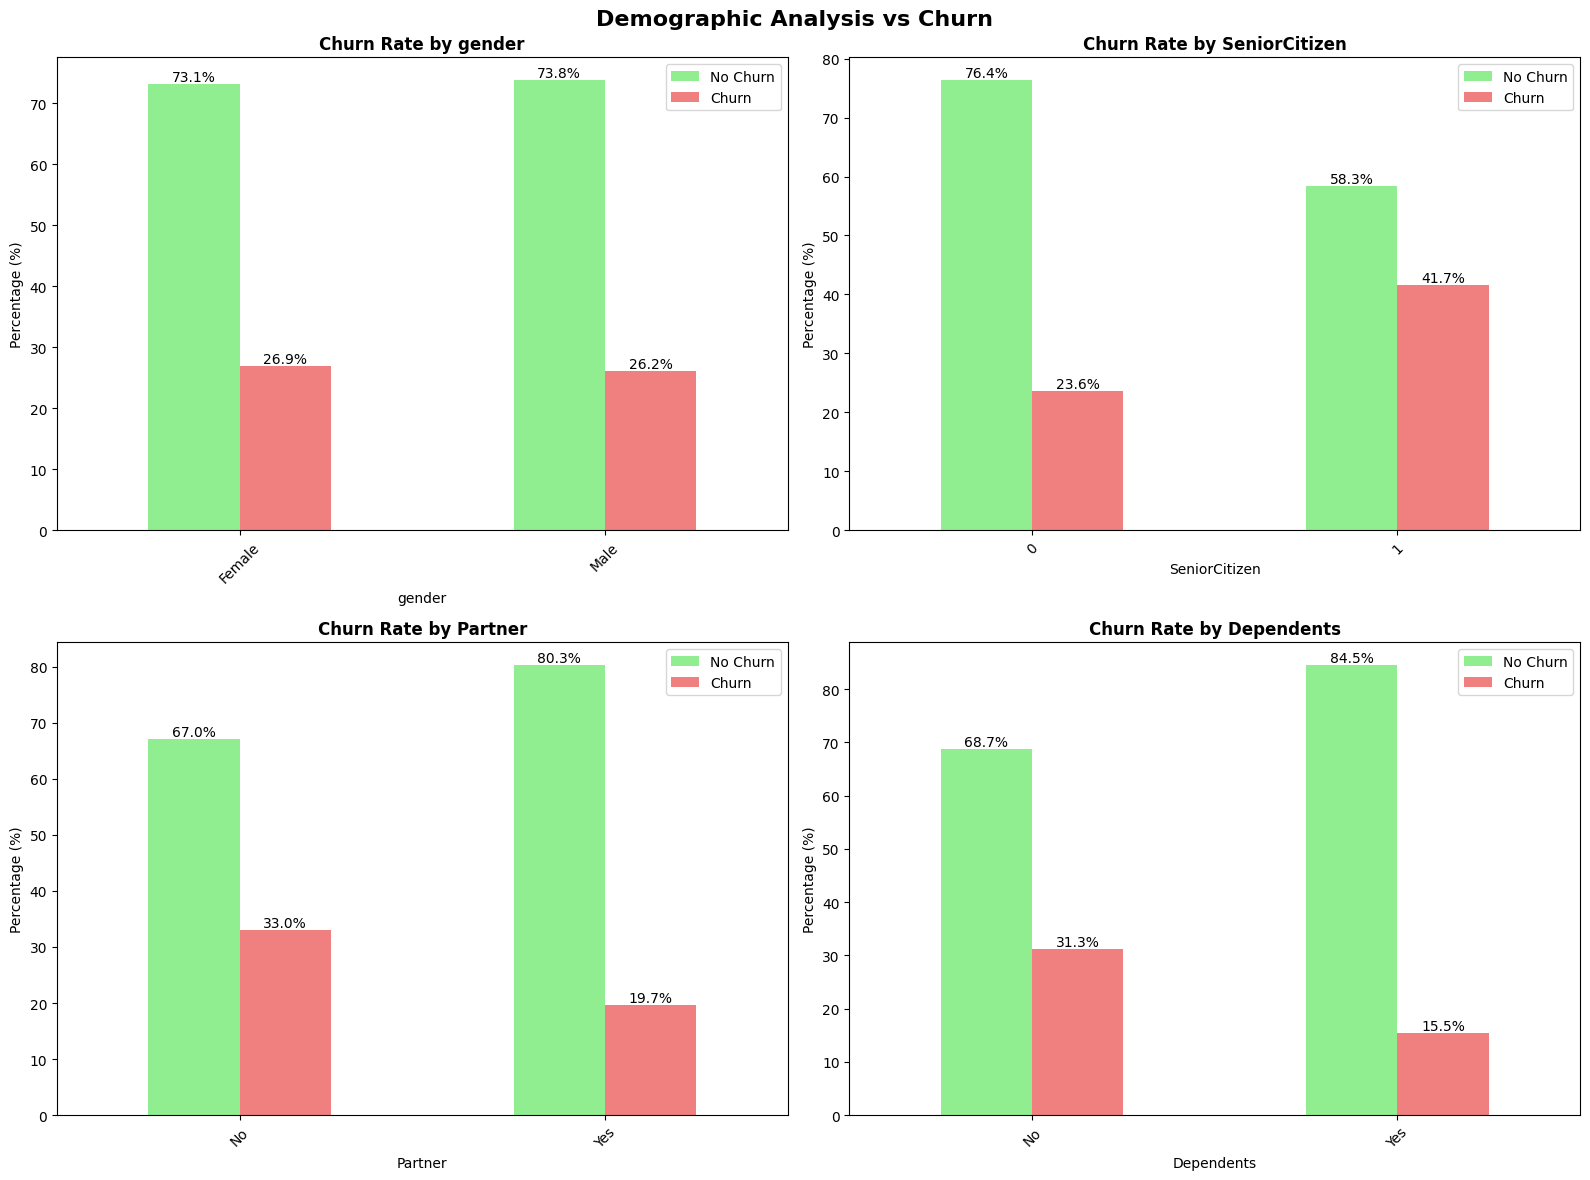

DEMOGRAPHIC ANALYSIS SUMMARY:

GENDER:
  Female: 939/3488 churned (26.92%)
  Male: 930/3555 churned (26.16%)

SENIORCITIZEN:
  0: 1393/5901 churned (23.61%)
  1: 476/1142 churned (41.68%)

PARTNER:
  No: 1200/3641 churned (32.96%)
  Yes: 669/3402 churned (19.66%)

DEPENDENTS:
  No: 1543/4933 churned (31.28%)
  Yes: 326/2110 churned (15.45%)


In [13]:
# Demographic analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Demographic Analysis vs Churn', fontsize=16, fontweight='bold')

demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i, feature in enumerate(demographic_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Create crosstab for churn analysis
    crosstab = pd.crosstab(df_clean[feature], df_clean['Churn'], normalize='index') * 100
    
    crosstab.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'])
    ax.set_title(f'Churn Rate by {feature}', fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage (%)')
    ax.legend(['No Churn', 'Churn'], loc='upper right')
    ax.tick_params(axis='x', rotation=45)
    
    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("DEMOGRAPHIC ANALYSIS SUMMARY:")
print("="*60)
for feature in demographic_features:
    print(f"\n{feature.upper()}:")
    crosstab = pd.crosstab(df_clean[feature], df_clean['Churn'])
    churn_rate = pd.crosstab(df_clean[feature], df_clean['Churn'], normalize='index')['Yes'] * 100
    
    for category in crosstab.index:
        total = crosstab.loc[category].sum()
        churned = crosstab.loc[category, 'Yes']
        rate = churn_rate[category]
        print(f"  {category}: {churned}/{total} churned ({rate:.2f}%)")

### 5.3 Service Usage Analysis

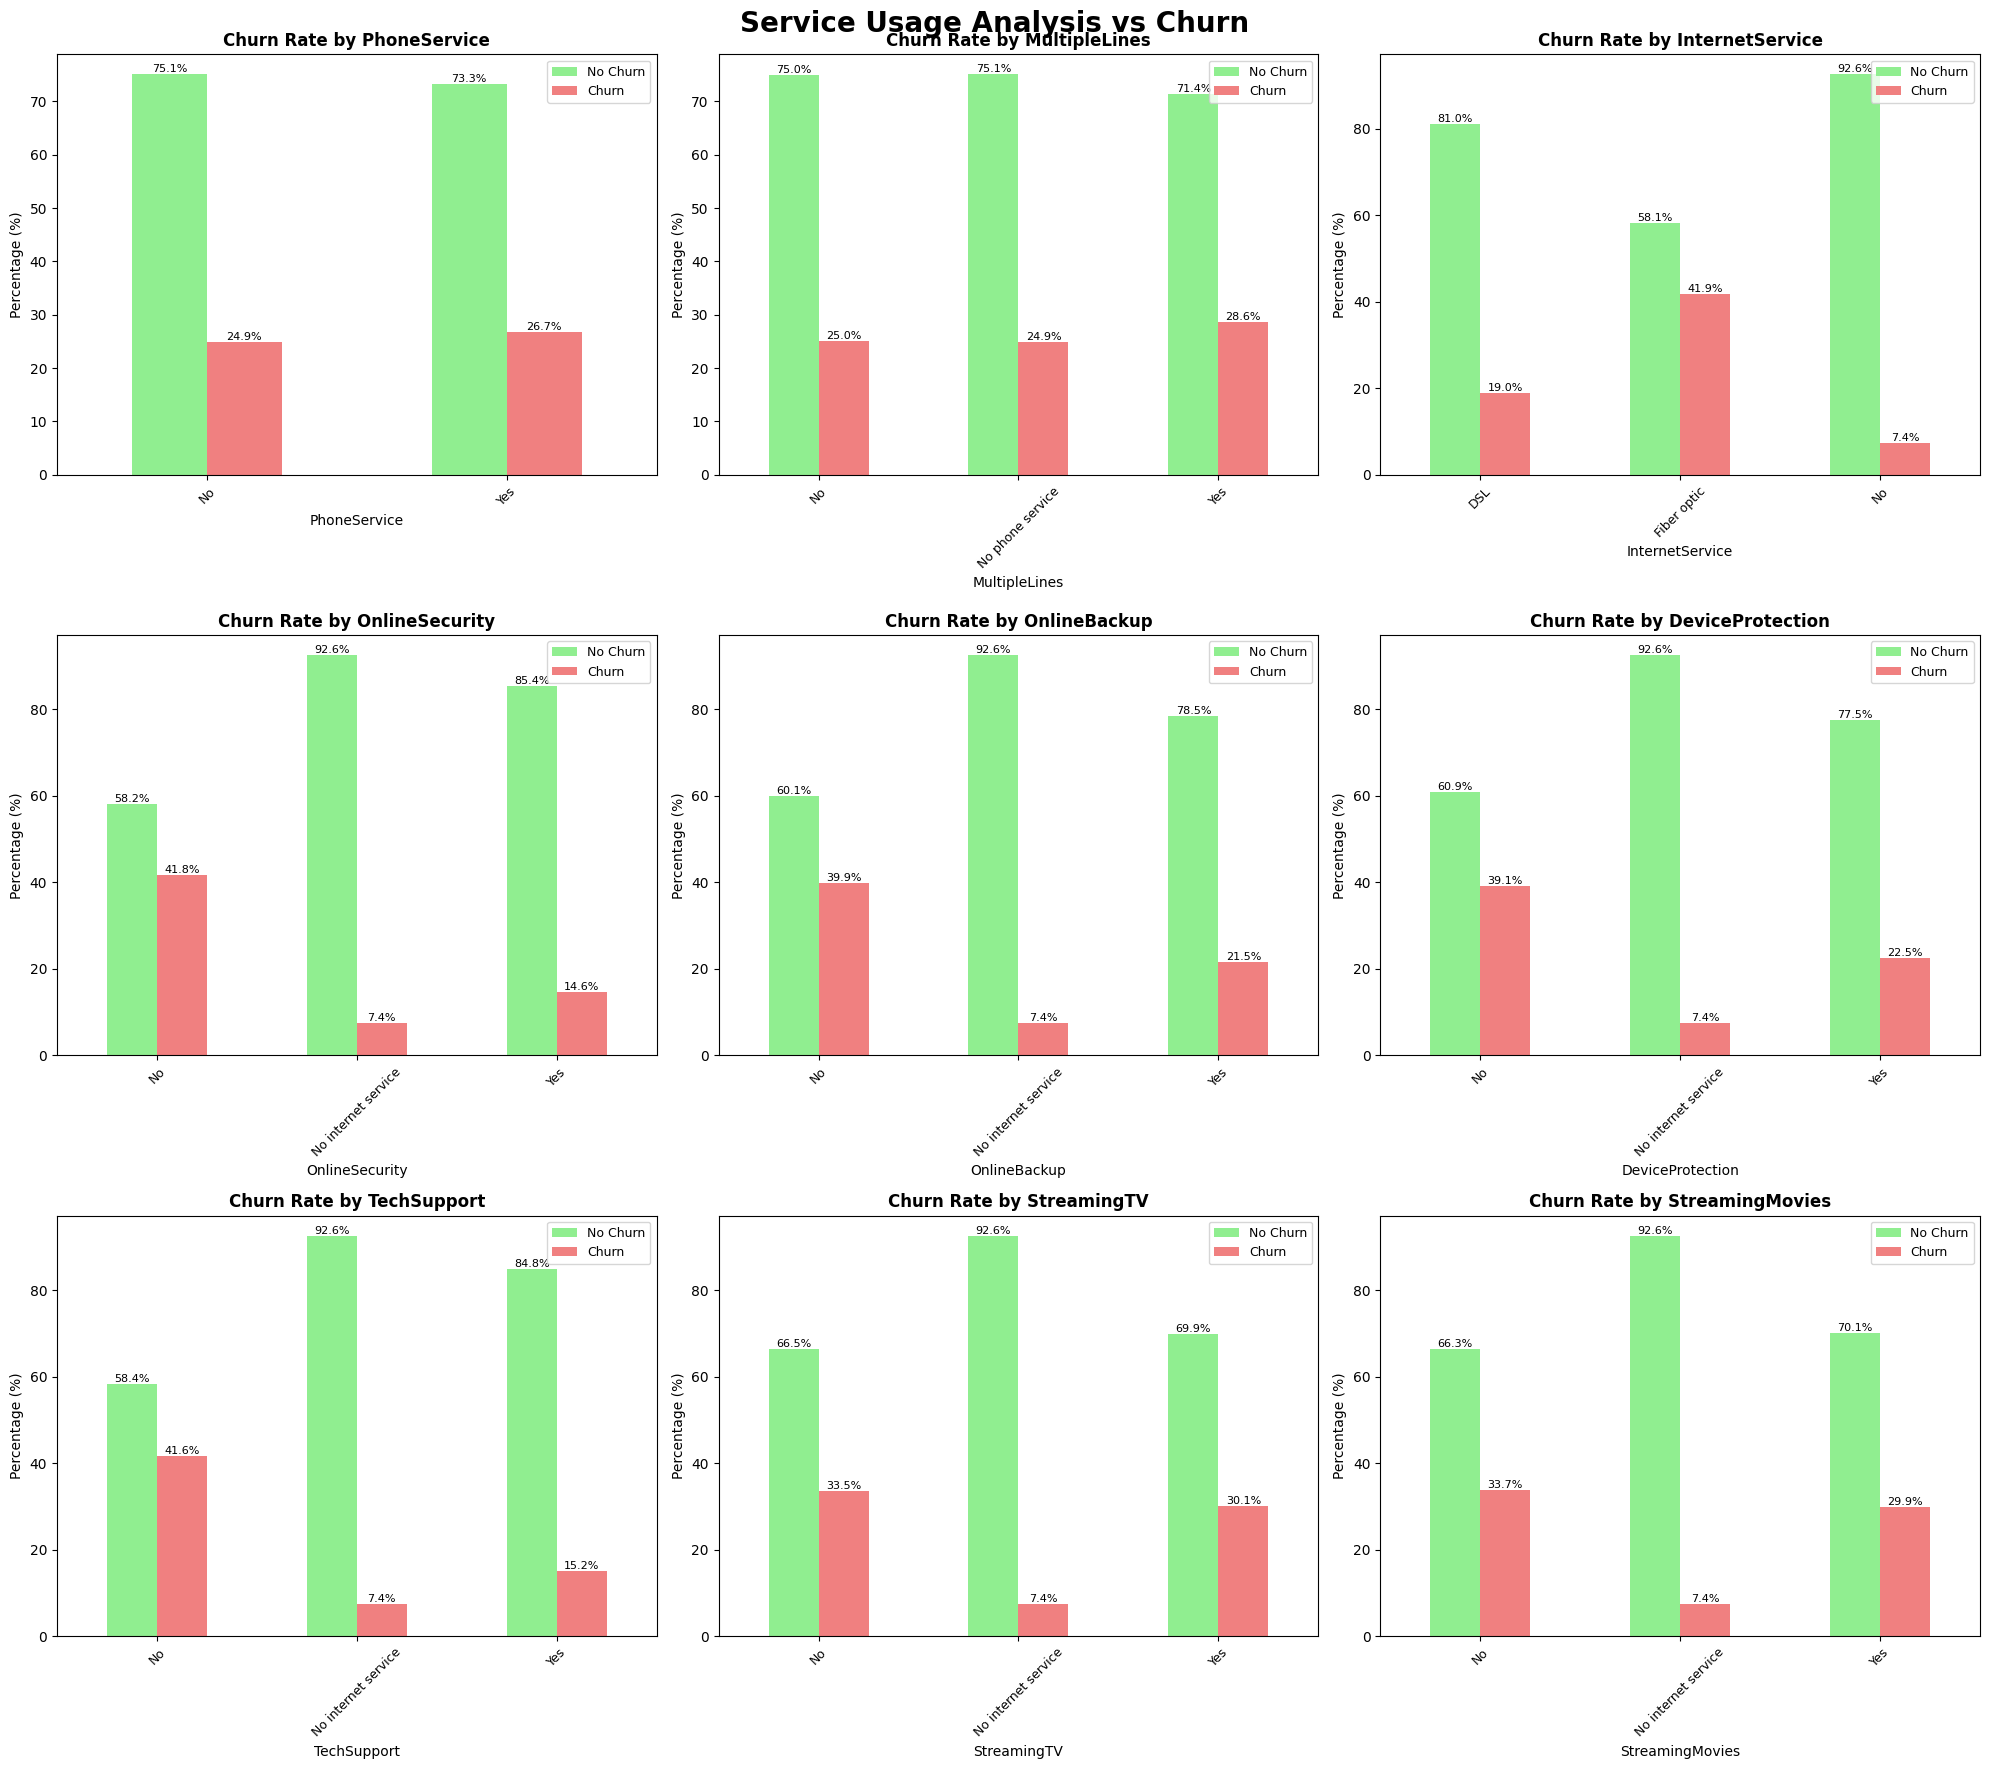

SERVICE USAGE ANALYSIS SUMMARY:

PHONESERVICE:
  No: 170/682 churned (24.93%)
  Yes: 1699/6361 churned (26.71%)

MULTIPLELINES:
  No: 849/3390 churned (25.04%)
  No phone service: 170/682 churned (24.93%)
  Yes: 850/2971 churned (28.61%)

INTERNETSERVICE:
  DSL: 459/2421 churned (18.96%)
  Fiber optic: 1297/3096 churned (41.89%)
  No: 113/1526 churned (7.40%)

ONLINESECURITY:
  No: 1461/3498 churned (41.77%)
  No internet service: 113/1526 churned (7.40%)
  Yes: 295/2019 churned (14.61%)

ONLINEBACKUP:
  No: 1233/3088 churned (39.93%)
  No internet service: 113/1526 churned (7.40%)
  Yes: 523/2429 churned (21.53%)

DEVICEPROTECTION:
  No: 1211/3095 churned (39.13%)
  No internet service: 113/1526 churned (7.40%)
  Yes: 545/2422 churned (22.50%)

TECHSUPPORT:
  No: 1446/3473 churned (41.64%)
  No internet service: 113/1526 churned (7.40%)
  Yes: 310/2044 churned (15.17%)

STREAMINGTV:
  No: 942/2810 churned (33.52%)
  No internet service: 113/1526 churned (7.40%)
  Yes: 814/2707 churned

In [14]:
# Service usage analysis
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a large subplot for all services
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Service Usage Analysis vs Churn', fontsize=20, fontweight='bold')

for i, service in enumerate(services):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Create crosstab for churn analysis
    crosstab = pd.crosstab(df_clean[service], df_clean['Churn'], normalize='index') * 100
    
    crosstab.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'])
    ax.set_title(f'Churn Rate by {service}', fontweight='bold', fontsize=12)
    ax.set_xlabel(service, fontsize=10)
    ax.set_ylabel('Percentage (%)', fontsize=10)
    ax.legend(['No Churn', 'Churn'], loc='upper right', fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    
    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()

# Print service analysis summary
print("SERVICE USAGE ANALYSIS SUMMARY:")
print("="*80)
for service in services:
    print(f"\n{service.upper()}:")
    crosstab = pd.crosstab(df_clean[service], df_clean['Churn'])
    churn_rate = pd.crosstab(df_clean[service], df_clean['Churn'], normalize='index')['Yes'] * 100
    
    for category in crosstab.index:
        total = crosstab.loc[category].sum()
        churned = crosstab.loc[category, 'Yes']
        rate = churn_rate[category]
        print(f"  {category}: {churned}/{total} churned ({rate:.2f}%)")

### 5.4 Account Information Analysis

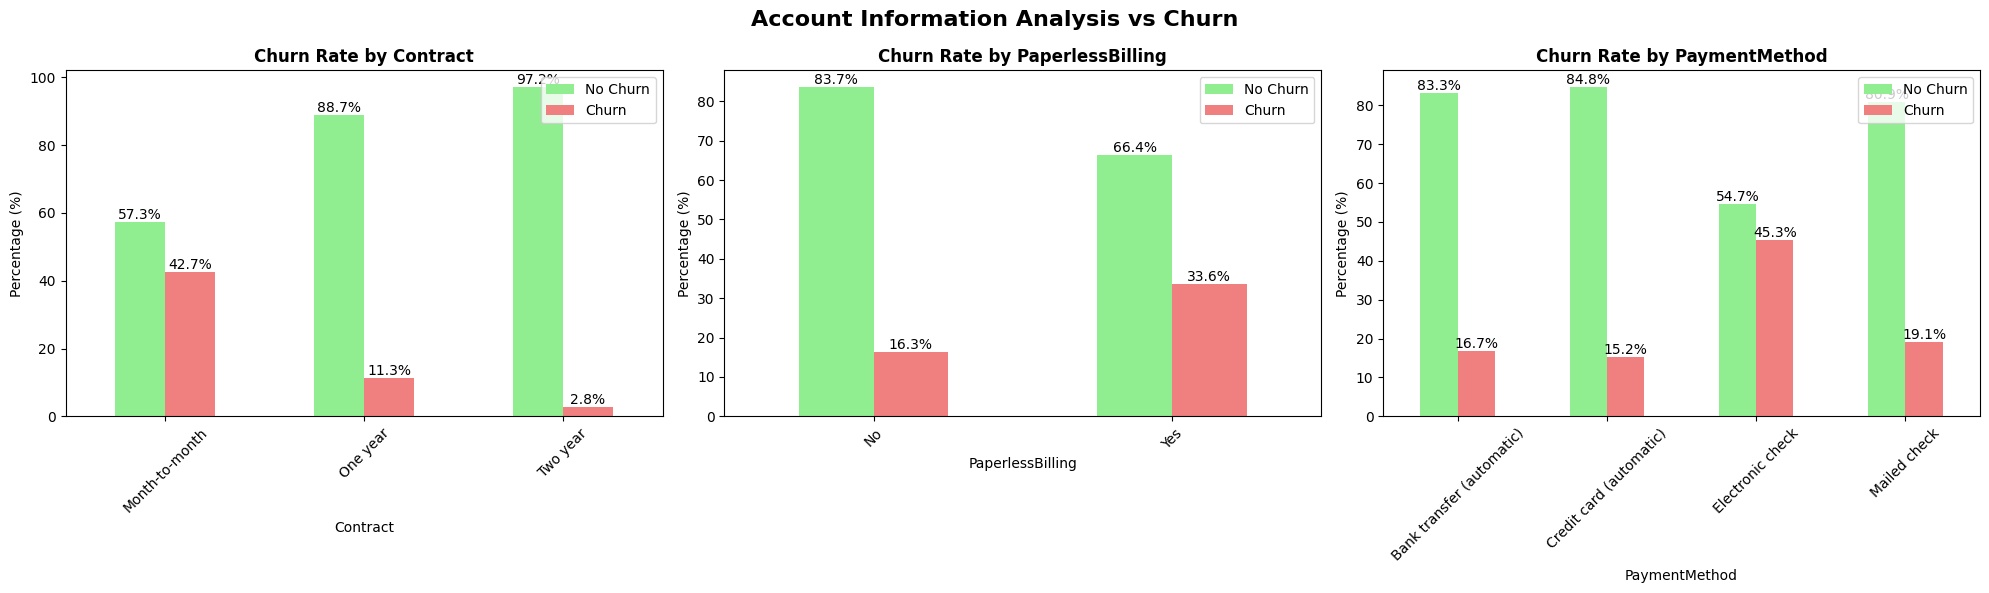


TENURE ANALYSIS:
        count   mean    std  min   25%   50%   75%   max
Churn                                                   
No     5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0


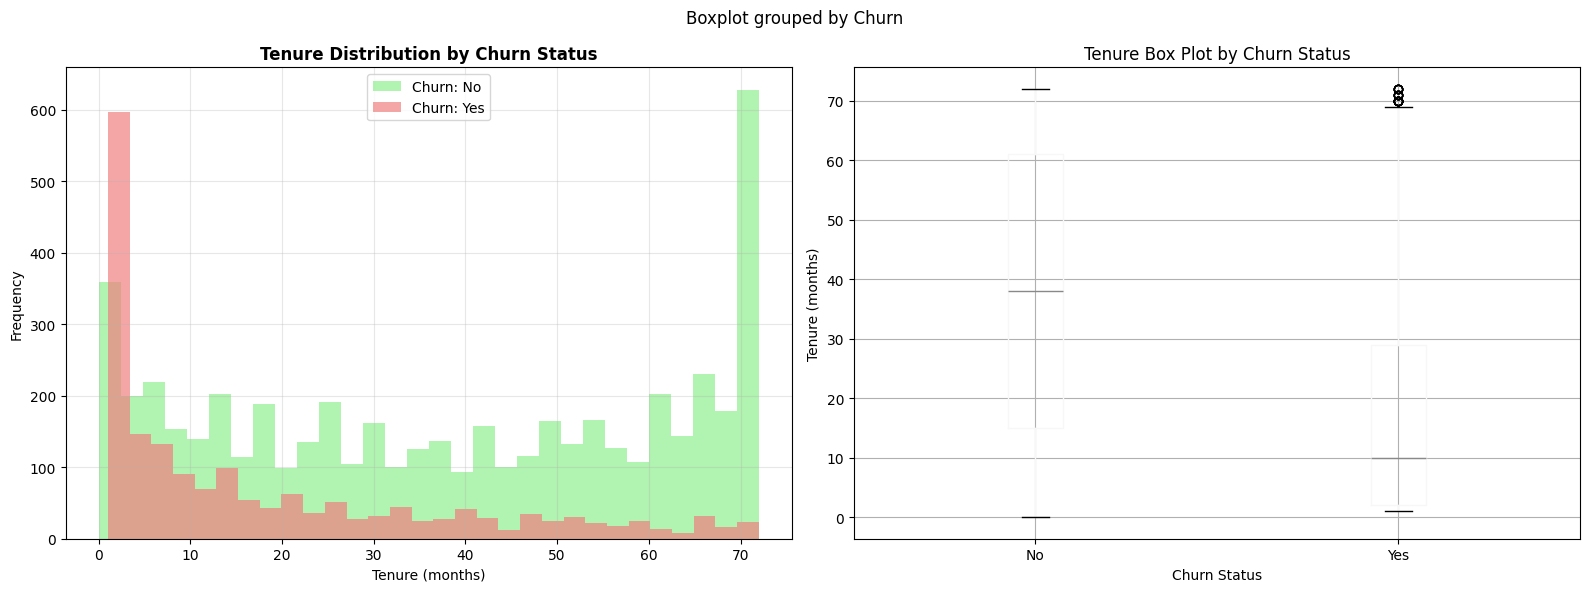


Average tenure for customers who churned: 17.98 months
Average tenure for customers who stayed: 37.57 months


In [15]:
# Account information analysis
account_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Account Information Analysis vs Churn', fontsize=16, fontweight='bold')

for i, feature in enumerate(account_features):
    ax = axes[i]
    
    # Create crosstab for churn analysis
    crosstab = pd.crosstab(df_clean[feature], df_clean['Churn'], normalize='index') * 100
    
    crosstab.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'])
    ax.set_title(f'Churn Rate by {feature}', fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage (%)')
    ax.legend(['No Churn', 'Churn'], loc='upper right')
    ax.tick_params(axis='x', rotation=45)
    
    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

# Tenure analysis (numerical)
print("\nTENURE ANALYSIS:")
print("="*50)
tenure_stats = df_clean.groupby('Churn')['tenure'].describe()
print(tenure_stats.round(2))

# Visualize tenure distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
for churn_status in ['No', 'Yes']:
    data = df_clean[df_clean['Churn'] == churn_status]['tenure']
    ax1.hist(data, bins=30, alpha=0.7, label=f'Churn: {churn_status}', 
             color='lightgreen' if churn_status == 'No' else 'lightcoral')

ax1.set_title('Tenure Distribution by Churn Status', fontweight='bold')
ax1.set_xlabel('Tenure (months)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
df_clean.boxplot(column='tenure', by='Churn', ax=ax2)
ax2.set_title('Tenure Box Plot by Churn Status')
ax2.set_xlabel('Churn Status')
ax2.set_ylabel('Tenure (months)')

plt.tight_layout()
plt.show()

print(f"\nAverage tenure for customers who churned: {df_clean[df_clean['Churn'] == 'Yes']['tenure'].mean():.2f} months")
print(f"Average tenure for customers who stayed: {df_clean[df_clean['Churn'] == 'No']['tenure'].mean():.2f} months")

### 5.5 Financial Analysis

FINANCIAL ANALYSIS SUMMARY:

MONTHLYCHARGES:
        count   mean    std    min    25%    50%   75%     max
Churn                                                         
No     5174.0  61.27  31.09  18.25  25.10  64.43  88.4  118.75
Yes    1869.0  74.44  24.67  18.85  56.15  79.65  94.2  118.35

Difference in average MonthlyCharges: $13.18
Churned customers pay more on average

TOTALCHARGES:
        count     mean      std    min    25%      50%      75%      max
Churn                                                                   
No     5174.0  2549.91  2329.95   0.00  572.9  1679.52  4262.85  8672.45
Yes    1869.0  1531.80  1890.82  18.85  134.5   703.55  2331.30  8684.80

Difference in average TotalCharges: $-1018.12
Churned customers pay less on average


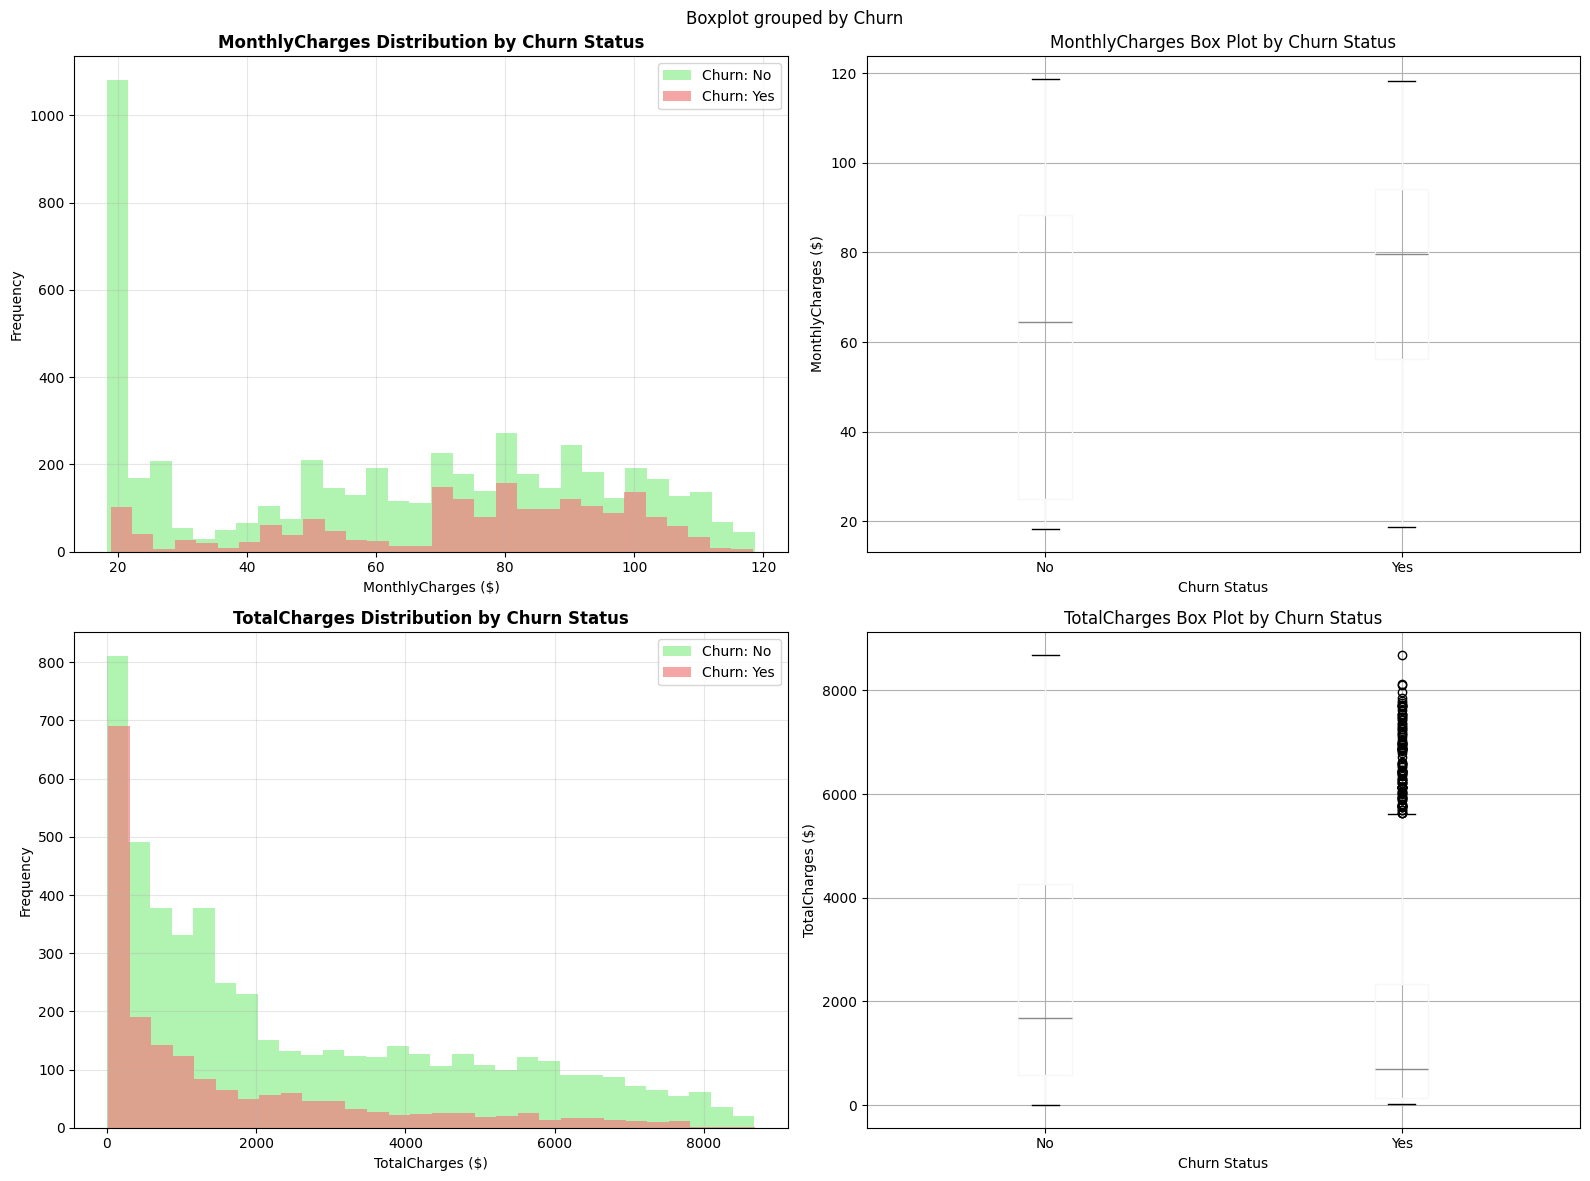


CHARGE SEGMENT ANALYSIS:

Monthly Charges Segment Analysis:
                        Total_Customers  Churned_Customers  Churn_Rate_%
MonthlyCharges_Segment                                                  
Low (≤$35)                         1735                189         10.89
Medium ($35-65)                    1409                326         23.14
High ($65-95)                      2604                936         35.94
Very High (>$95)                   1295                418         32.28


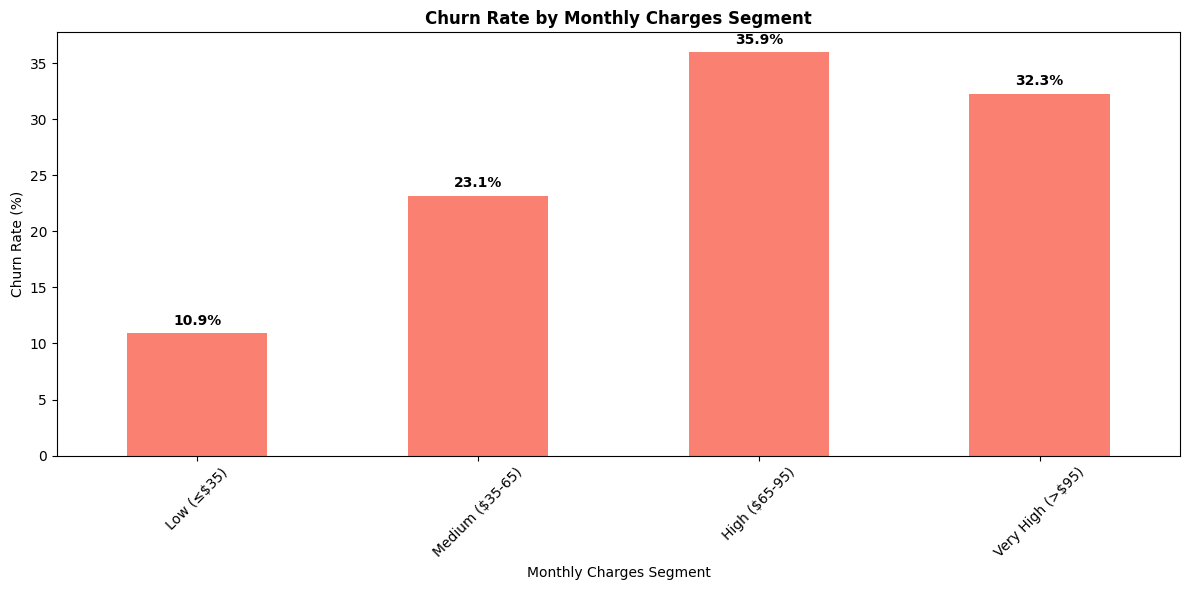

In [16]:
# Financial analysis
charge_features = ['MonthlyCharges', 'TotalCharges']

# Statistical summary by churn status
print("FINANCIAL ANALYSIS SUMMARY:")
print("="*70)
for feature in charge_features:
  print(f"\n{feature.upper()}:")
  stats = df_clean.groupby('Churn')[feature].describe()
  print(stats.round(2))

  # Calculate the difference
  mean_churned = df_clean[df_clean['Churn'] == 'Yes'][feature].mean()
  mean_stayed = df_clean[df_clean['Churn'] == 'No'][feature].mean()
  difference = mean_churned - mean_stayed
  print(f"\nDifference in average {feature}: ${difference:.2f}")
  print(
      f"Churned customers pay {'more' if difference > 0 else 'less'} on average")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Financial Analysis vs Churn', fontsize=16, fontweight='bold')

for i, feature in enumerate(charge_features):
  # Histogram
  ax1 = axes[i, 0]
  for churn_status in ['No', 'Yes']:
    data = df_clean[df_clean['Churn'] == churn_status][feature]
    ax1.hist(data, bins=30, alpha=0.7, label=f'Churn: {churn_status}',
             color='lightgreen' if churn_status == 'No' else 'lightcoral')

  ax1.set_title(f'{feature} Distribution by Churn Status', fontweight='bold')
  ax1.set_xlabel(f'{feature} ($)')
  ax1.set_ylabel('Frequency')
  ax1.legend()
  ax1.grid(True, alpha=0.3)

  # Box plot
  ax2 = axes[i, 1]
  df_clean.boxplot(column=feature, by='Churn', ax=ax2)
  ax2.set_title(f'{feature} Box Plot by Churn Status')
  ax2.set_xlabel('Churn Status')
  ax2.set_ylabel(f'{feature} ($)')

plt.tight_layout()
plt.show()

# Create charge segments for analysis
print("\nCHARGE SEGMENT ANALYSIS:")
print("="*50)

# Monthly charges segments
df_clean['MonthlyCharges_Segment'] = pd.cut(df_clean['MonthlyCharges'],
                                            bins=[0, 35, 65, 95, float('inf')],
                                            labels=['Low (≤$35)', 'Medium ($35-65)', 'High ($65-95)', 'Very High (>$95)'])

segment_analysis = df_clean.groupby('MonthlyCharges_Segment')['Churn'].agg(['count', lambda x: (x == 'Yes').sum(),
                                                                           lambda x: (x == 'Yes').mean() * 100]).round(2)
segment_analysis.columns = ['Total_Customers',
                            'Churned_Customers', 'Churn_Rate_%']
print("\nMonthly Charges Segment Analysis:")
print(segment_analysis)

# Visualize segment analysis
fig, ax = plt.subplots(figsize=(12, 6))
segment_analysis['Churn_Rate_%'].plot(kind='bar', ax=ax, color='salmon')
ax.set_title('Churn Rate by Monthly Charges Segment', fontweight='bold')
ax.set_xlabel('Monthly Charges Segment')
ax.set_ylabel('Churn Rate (%)')
ax.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(segment_analysis['Churn_Rate_%']):
  ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 5.6 Correlation Analysis

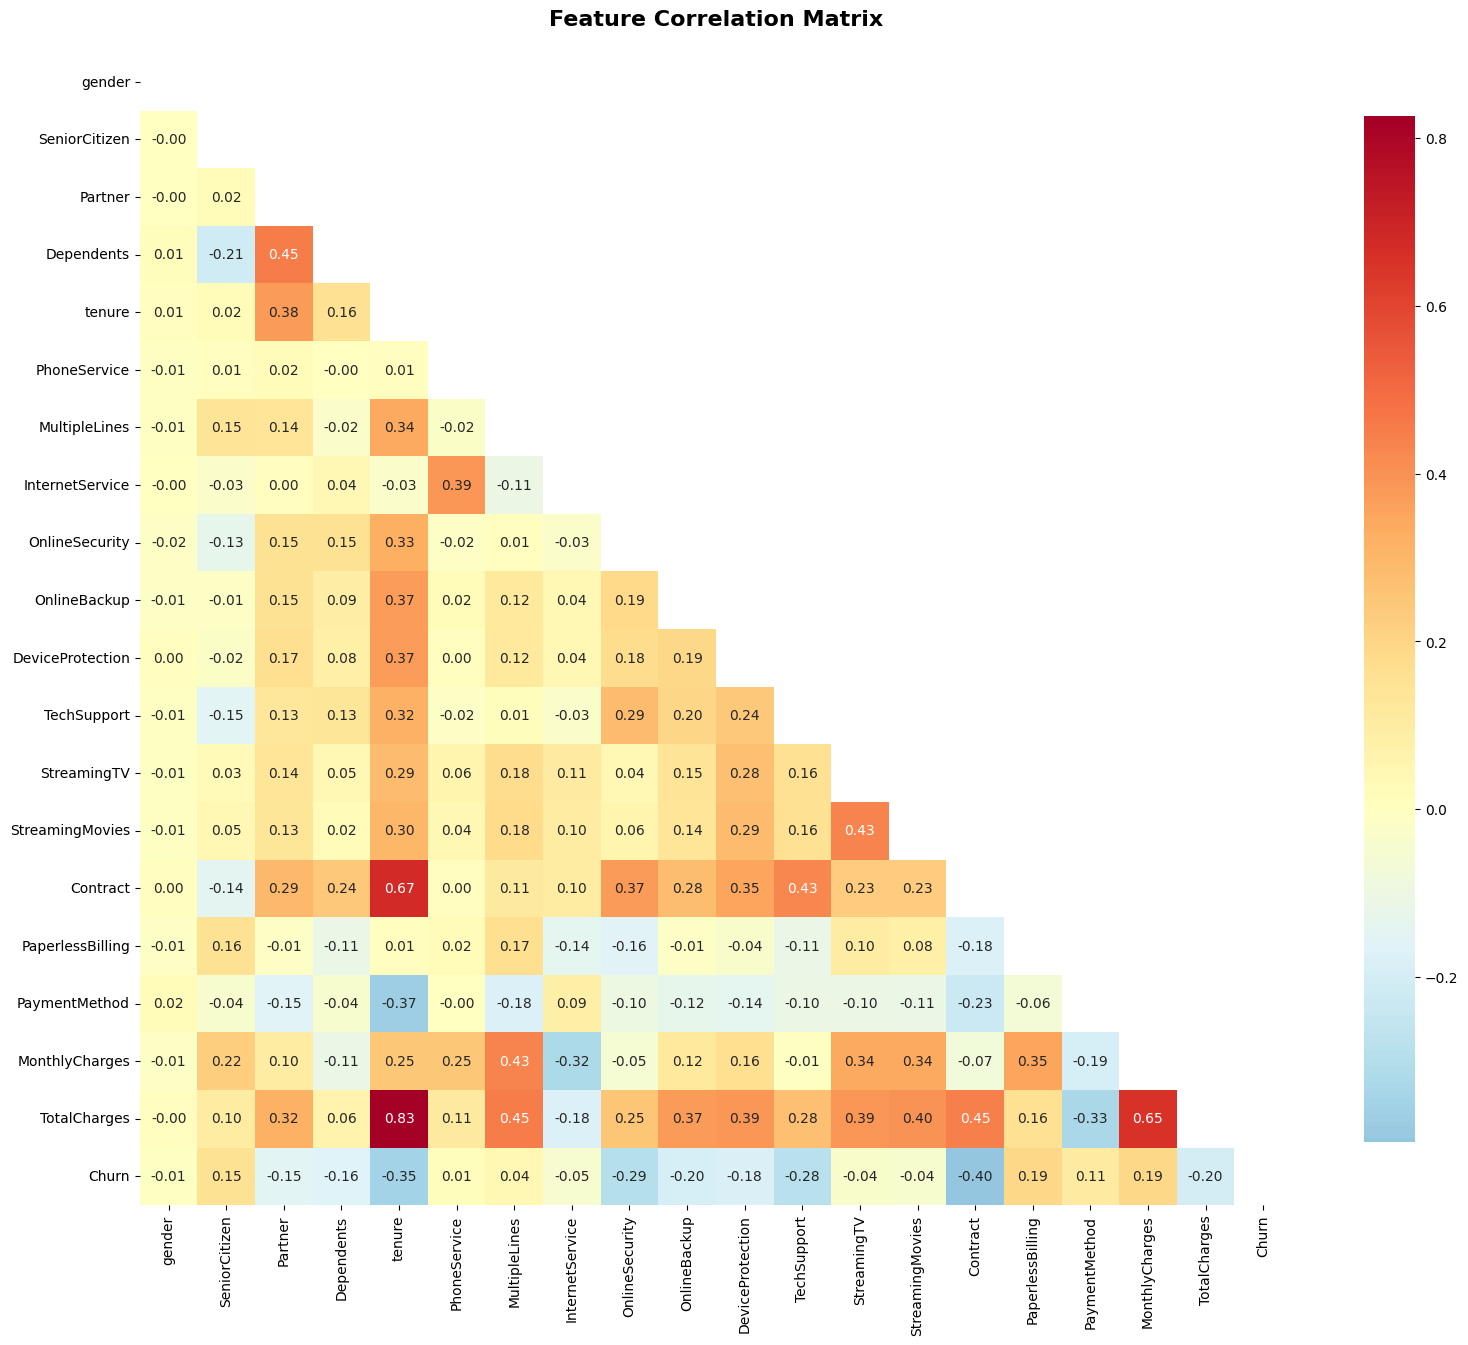

FEATURES MOST CORRELATED WITH CHURN:
Contract            : 0.397 (negative)
tenure              : 0.352 (negative)
OnlineSecurity      : 0.289 (negative)
TechSupport         : 0.282 (negative)
TotalCharges        : 0.198 (negative)
OnlineBackup        : 0.196 (negative)
MonthlyCharges      : 0.193 (positive)
PaperlessBilling    : 0.192 (positive)
DeviceProtection    : 0.178 (negative)
Dependents          : 0.164 (negative)
SeniorCitizen       : 0.151 (positive)
Partner             : 0.150 (negative)
PaymentMethod       : 0.107 (positive)
InternetService     : 0.047 (negative)
StreamingMovies     : 0.038 (negative)
MultipleLines       : 0.038 (positive)
StreamingTV         : 0.037 (negative)
PhoneService        : 0.012 (positive)
gender              : 0.009 (negative)


STRONG CORRELATIONS BETWEEN FEATURES (|r| > 0.7):
tenure ↔ TotalCharges: 0.826


In [17]:
# Correlation analysis
# First, create a copy for encoding
df_encoded = df_clean.copy()

# Encode categorical variables for correlation analysis
label_encoders = {}
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'customerID':  # Skip customer ID
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Calculate correlation matrix (exclude any segment columns that might have been created)
columns_to_exclude = ['customerID']
# Check if MonthlyCharges_Segment exists and exclude it
if 'MonthlyCharges_Segment' in df_encoded.columns:
    columns_to_exclude.append('MonthlyCharges_Segment')

correlation_matrix = df_encoded.drop(columns_to_exclude, axis=1).corr()

# Create correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                     square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find features most correlated with Churn
churn_correlations = correlation_matrix['Churn'].abs().sort_values(ascending=False)
print("FEATURES MOST CORRELATED WITH CHURN:")
print("="*50)
for feature, corr in churn_correlations.items():
    if feature != 'Churn':
        direction = "positive" if correlation_matrix['Churn'][feature] > 0 else "negative"
        print(f"{feature:<20}: {corr:.3f} ({direction})")

# Strong correlations between features (potential multicollinearity)
print("\n\nSTRONG CORRELATIONS BETWEEN FEATURES (|r| > 0.7):")
print("="*60)
strong_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            if feature1 != 'Churn' and feature2 != 'Churn':
                strong_corr_pairs.append((feature1, feature2, corr_val))
                print(f"{feature1} ↔ {feature2}: {corr_val:.3f}")

if not strong_corr_pairs:
    print("No strong correlations found between non-target features.")

## 6. Feature Engineering

In [18]:
# Feature Engineering
df_engineered = df_clean.copy()

print("FEATURE ENGINEERING:")
print("="*50)

# Customer Lifetime Value (CLV) estimation
df_engineered['EstimatedCLV'] = df_engineered['MonthlyCharges'] * df_engineered['tenure']
print("Created EstimatedCLV: MonthlyCharges × tenure")

# Average monthly charges per tenure month
df_engineered['AvgChargesPerMonth'] = np.where(df_engineered['tenure'] > 0, 
                                              df_engineered['TotalCharges'] / df_engineered['tenure'],
                                              df_engineered['MonthlyCharges'])
print("Created AvgChargesPerMonth: TotalCharges ÷ tenure")

# 3. Tenure categories
def categorize_tenure(tenure):
    if tenure <= 12:
        return 'New (≤1 year)'
    elif tenure <= 36:
        return 'Medium (1-3 years)'
    else:
        return 'Long-term (>3 years)'

df_engineered['TenureCategory'] = df_engineered['tenure'].apply(categorize_tenure)
print("Created TenureCategory: categorized tenure into 3 groups")

# Total services count
service_columns = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count services (excluding 'No internet service' and 'No' values)
def count_services(row):
    count = 0
    for col in service_columns:
        if col in row.index:
            if col == 'PhoneService':
                count += 1 if row[col] == 'Yes' else 0
            elif col == 'InternetService':
                count += 1 if row[col] != 'No' else 0
            else:
                count += 1 if row[col] == 'Yes' else 0
    return count

df_engineered['TotalServices'] = df_engineered.apply(count_services, axis=1)
print("Created TotalServices: count of active services")

# Has family (Partner or Dependents)
df_engineered['HasFamily'] = ((df_engineered['Partner'] == 'Yes') | 
                             (df_engineered['Dependents'] == 'Yes')).astype(int)
print("Created HasFamily: 1 if has partner or dependents")

# High-value customer indicator
high_value_threshold = df_engineered['MonthlyCharges'].quantile(0.75)
df_engineered['HighValueCustomer'] = (df_engineered['MonthlyCharges'] >= high_value_threshold).astype(int)
print(f"Created HighValueCustomer: 1 if MonthlyCharges >= ${high_value_threshold:.2f}")

# Contract risk score (higher for month-to-month)
contract_risk_map = {'Month-to-month': 3, 'One year': 2, 'Two year': 1}
df_engineered['ContractRisk'] = df_engineered['Contract'].map(contract_risk_map)
print("Created ContractRisk: 3=Month-to-month, 2=One year, 1=Two year")

# Payment method risk (higher for electronic check)
payment_risk_map = {'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1}
df_engineered['PaymentRisk'] = df_engineered['PaymentMethod'].map(payment_risk_map)
print("Created PaymentRisk: higher values for riskier payment methods")

# Display new features summary
print(f"\nNEW FEATURES CREATED: {len(df_engineered.columns) - len(df_clean.columns)}")
print(f"TOTAL FEATURES NOW: {len(df_engineered.columns)}")

# Show sample of new features
new_features = ['EstimatedCLV', 'AvgChargesPerMonth', 'TenureCategory', 'TotalServices', 
               'HasFamily', 'HighValueCustomer', 'ContractRisk', 'PaymentRisk']

print(f"\nSAMPLE OF NEW FEATURES:")
print(df_engineered[new_features].head(10))

FEATURE ENGINEERING:
Created EstimatedCLV: MonthlyCharges × tenure
Created AvgChargesPerMonth: TotalCharges ÷ tenure
Created TenureCategory: categorized tenure into 3 groups
Created TotalServices: count of active services
Created HasFamily: 1 if has partner or dependents
Created HighValueCustomer: 1 if MonthlyCharges >= $89.85
Created ContractRisk: 3=Month-to-month, 2=One year, 1=Two year
Created PaymentRisk: higher values for riskier payment methods

NEW FEATURES CREATED: 8
TOTAL FEATURES NOW: 30

SAMPLE OF NEW FEATURES:
   EstimatedCLV  AvgChargesPerMonth        TenureCategory  TotalServices  \
0         29.85           29.850000         New (≤1 year)              2   
1       1936.30           55.573529    Medium (1-3 years)              4   
2        107.70           54.075000         New (≤1 year)              4   
3       1903.50           40.905556  Long-term (>3 years)              4   
4        141.40           75.825000         New (≤1 year)              2   
5        797.20 

IMPACT OF NEW FEATURES ON CHURN:

EstimatedCLV:
  Churned customers: 1531.61
  Stayed customers: 2549.77
  Difference: -1018.16

AvgChargesPerMonth:
  Churned customers: 74.43
  Stayed customers: 61.27
  Difference: 13.16

TotalServices:
  Churned customers: 3.62
  Stayed customers: 3.76
  Difference: -0.15

ContractRisk:
  Churned customers: 2.86
  Stayed customers: 2.11
  Difference: 0.75

PaymentRisk:
  Churned customers: 2.31
  Stayed customers: 1.75
  Difference: 0.56

TenureCategory Churn Rates:
  Long-term (>3 years): 11.93%
  Medium (1-3 years): 25.54%
  New (≤1 year): 47.44%

HasFamily Churn Rates:
  0: 34.24%
  1: 19.82%

HighValueCustomer Churn Rates:
  0: 24.45%
  1: 32.75%


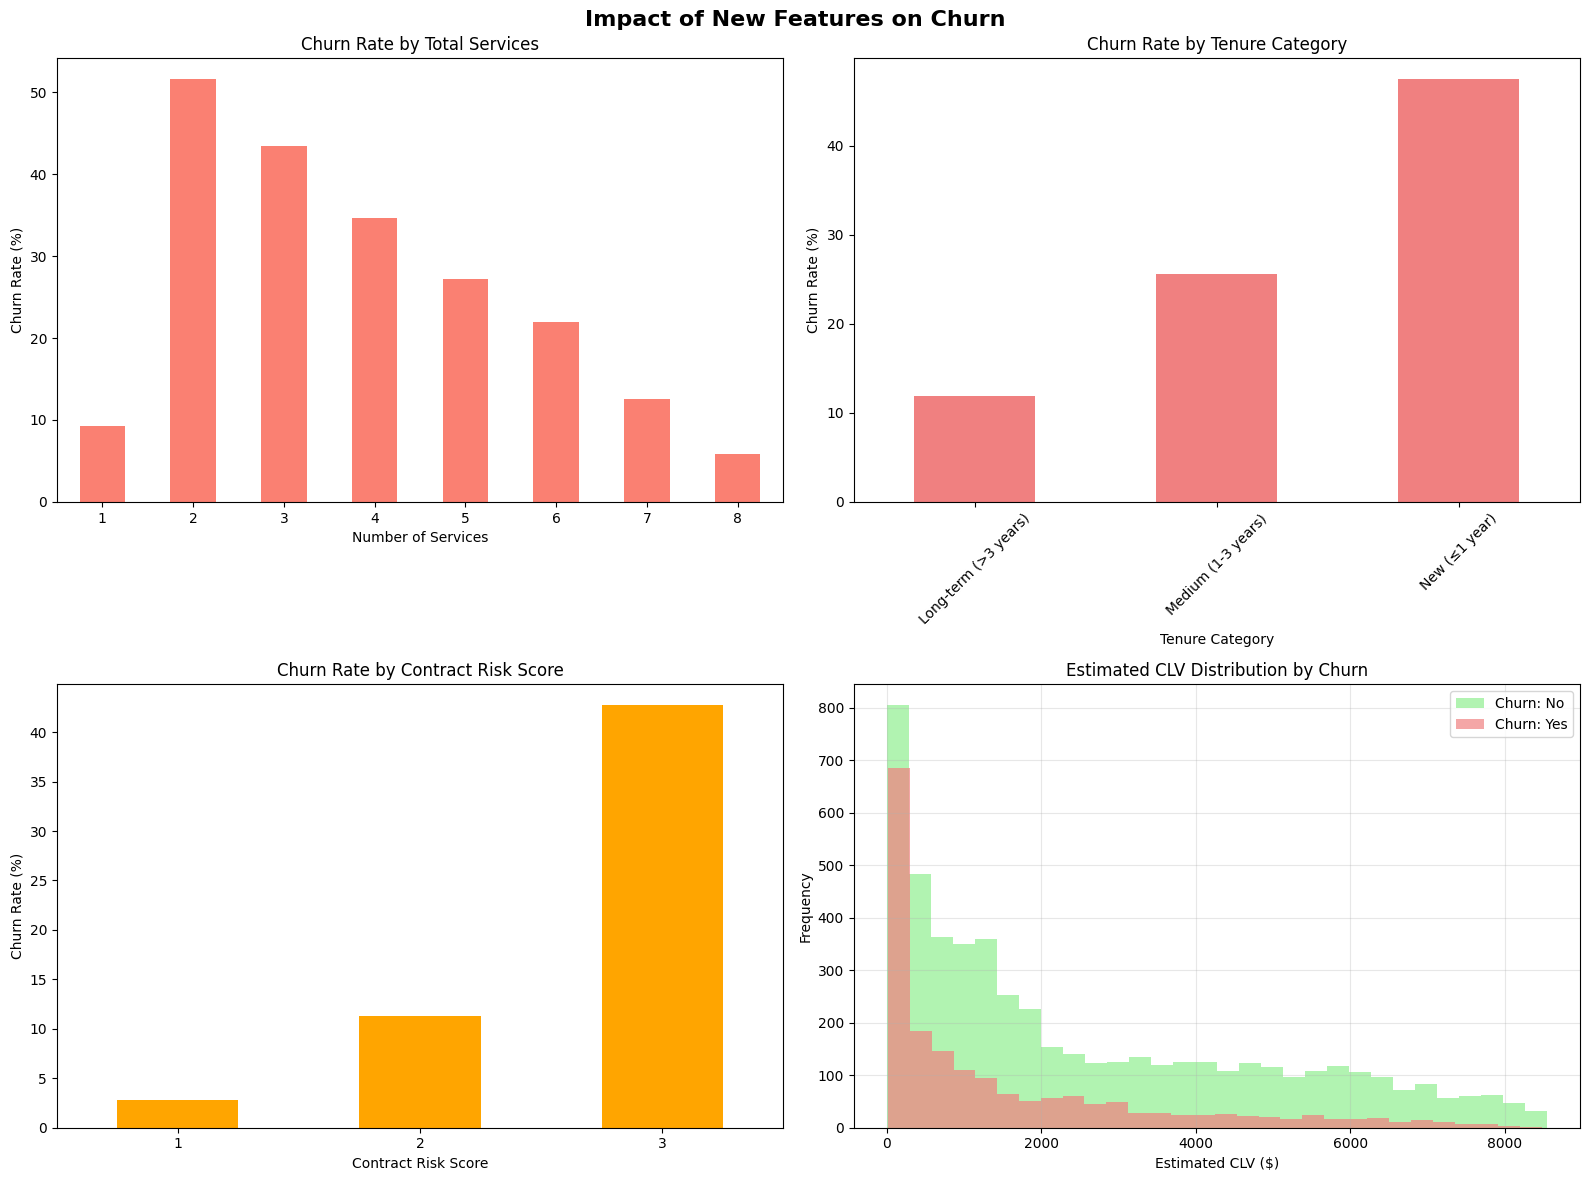

In [19]:
# Analyze the impact of new features on churn
print("IMPACT OF NEW FEATURES ON CHURN:")
print("="*60)

# Numerical features
numerical_new_features = ['EstimatedCLV', 'AvgChargesPerMonth', 'TotalServices', 'ContractRisk', 'PaymentRisk']

for feature in numerical_new_features:
    churned_mean = df_engineered[df_engineered['Churn'] == 'Yes'][feature].mean()
    stayed_mean = df_engineered[df_engineered['Churn'] == 'No'][feature].mean()
    
    print(f"\n{feature}:")
    print(f"  Churned customers: {churned_mean:.2f}")
    print(f"  Stayed customers: {stayed_mean:.2f}")
    print(f"  Difference: {churned_mean - stayed_mean:.2f}")

# Categorical features
categorical_new_features = ['TenureCategory', 'HasFamily', 'HighValueCustomer']

for feature in categorical_new_features:
    print(f"\n{feature} Churn Rates:")
    churn_rate = pd.crosstab(df_engineered[feature], df_engineered['Churn'], normalize='index')['Yes'] * 100
    for category, rate in churn_rate.items():
        print(f"  {category}: {rate:.2f}%")

# Visualize key new features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Impact of New Features on Churn', fontsize=16, fontweight='bold')

# TotalServices
ax1 = axes[0, 0]
services_churn = df_engineered.groupby('TotalServices')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
services_churn.plot(kind='bar', ax=ax1, color='salmon')
ax1.set_title('Churn Rate by Total Services')
ax1.set_xlabel('Number of Services')
ax1.set_ylabel('Churn Rate (%)')
ax1.tick_params(axis='x', rotation=0)

# TenureCategory
ax2 = axes[0, 1]
tenure_cat_churn = pd.crosstab(df_engineered['TenureCategory'], df_engineered['Churn'], normalize='index')['Yes'] * 100
tenure_cat_churn.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Churn Rate by Tenure Category')
ax2.set_xlabel('Tenure Category')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='x', rotation=45)

# ContractRisk
ax3 = axes[1, 0]
contract_risk_churn = df_engineered.groupby('ContractRisk')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
contract_risk_churn.plot(kind='bar', ax=ax3, color='orange')
ax3.set_title('Churn Rate by Contract Risk Score')
ax3.set_xlabel('Contract Risk Score')
ax3.set_ylabel('Churn Rate (%)')
ax3.tick_params(axis='x', rotation=0)

# EstimatedCLV distribution
ax4 = axes[1, 1]
for churn_status in ['No', 'Yes']:
    data = df_engineered[df_engineered['Churn'] == churn_status]['EstimatedCLV']
    ax4.hist(data, bins=30, alpha=0.7, label=f'Churn: {churn_status}',
            color='lightgreen' if churn_status == 'No' else 'lightcoral')

ax4.set_title('Estimated CLV Distribution by Churn')
ax4.set_xlabel('Estimated CLV ($)')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Statistical Analysis

In [20]:
# Statistical Tests
print("STATISTICAL SIGNIFICANCE TESTS:")
print("="*60)

# Chi-square tests for categorical variables
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

print("\nCHI-SQUARE TESTS (Categorical Features vs Churn):")
print("-" * 80)
print(f"{'Feature':<20} {'Chi2 Statistic':<15} {'p-value':<12} {'Significant':<12}")
print("-" * 80)

significant_categorical = []
for feature in categorical_features:
    if feature in df_engineered.columns:
        # Create contingency table
        contingency_table = pd.crosstab(df_engineered[feature], df_engineered['Churn'])
        
        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Check significance
        is_significant = "Yes" if p_value < 0.05 else "No"
        if p_value < 0.05:
            significant_categorical.append(feature)
        
        print(f"{feature:<20} {chi2:<15.4f} {p_value:<12.6f} {is_significant:<12}")

# T-tests for numerical variables
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'EstimatedCLV', 
                     'AvgChargesPerMonth', 'TotalServices', 'ContractRisk', 'PaymentRisk']

print(f"\n\nT-TESTS (Numerical Features vs Churn):")
print("-" * 80)
print(f"{'Feature':<20} {'t-statistic':<15} {'p-value':<12} {'Significant':<12}")
print("-" * 80)

significant_numerical = []
for feature in numerical_features:
    if feature in df_engineered.columns:
        # Separate data by churn status
        churned = df_engineered[df_engineered['Churn'] == 'Yes'][feature]
        not_churned = df_engineered[df_engineered['Churn'] == 'No'][feature]
        
        # Perform independent t-test
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(churned, not_churned)
        
        # Check significance
        is_significant = "Yes" if p_value < 0.05 else "No"
        if p_value < 0.05:
            significant_numerical.append(feature)
        
        print(f"{feature:<20} {t_stat:<15.4f} {p_value:<12.6f} {is_significant:<12}")

print(f"\n\nSUMMARY:")
print(f"Significant categorical features: {len(significant_categorical)}")
print(f"Significant numerical features: {len(significant_numerical)}")
print(f"\nSignificant categorical: {significant_categorical}")
print(f"Significant numerical: {significant_numerical}")

STATISTICAL SIGNIFICANCE TESTS:

CHI-SQUARE TESTS (Categorical Features vs Churn):
--------------------------------------------------------------------------------
Feature              Chi2 Statistic  p-value      Significant 
--------------------------------------------------------------------------------
gender               0.4841          0.486579     No          
SeniorCitizen        159.4263        0.000000     Yes         
Partner              158.7334        0.000000     Yes         
Dependents           189.1292        0.000000     Yes         
PhoneService         0.9150          0.338783     No          
MultipleLines        11.3304         0.003464     Yes         
InternetService      732.3096        0.000000     Yes         
OnlineSecurity       849.9990        0.000000     Yes         
OnlineBackup         601.8128        0.000000     Yes         
DeviceProtection     558.4194        0.000000     Yes         
TechSupport          828.1971        0.000000     Yes         

## 8. Advanced Analysis and Insights

CUSTOMER SEGMENTATION ANALYSIS:
Customer Segment Analysis:
                   Total_Customers  Churned  Churn_Rate_%  \
CustomerSegment                                             
Economy Long-term             1861      133          7.15   
Economy New                   1964      870         44.30   
Medium-term                   1856      474         25.54   
Premium Long-term             1140      225         19.74   
Premium New                    222      167         75.23   

                   Avg_Monthly_Charges  Avg_Total_Charges  Avg_Tenure  
CustomerSegment                                                        
Economy Long-term                53.21            3043.53       56.92  
Economy New                      51.53             240.56        4.59  
Medium-term                      63.25            1513.54       23.73  
Premium Long-term               102.69            6124.01       59.38  
Premium New                      96.51             581.95        5.98  


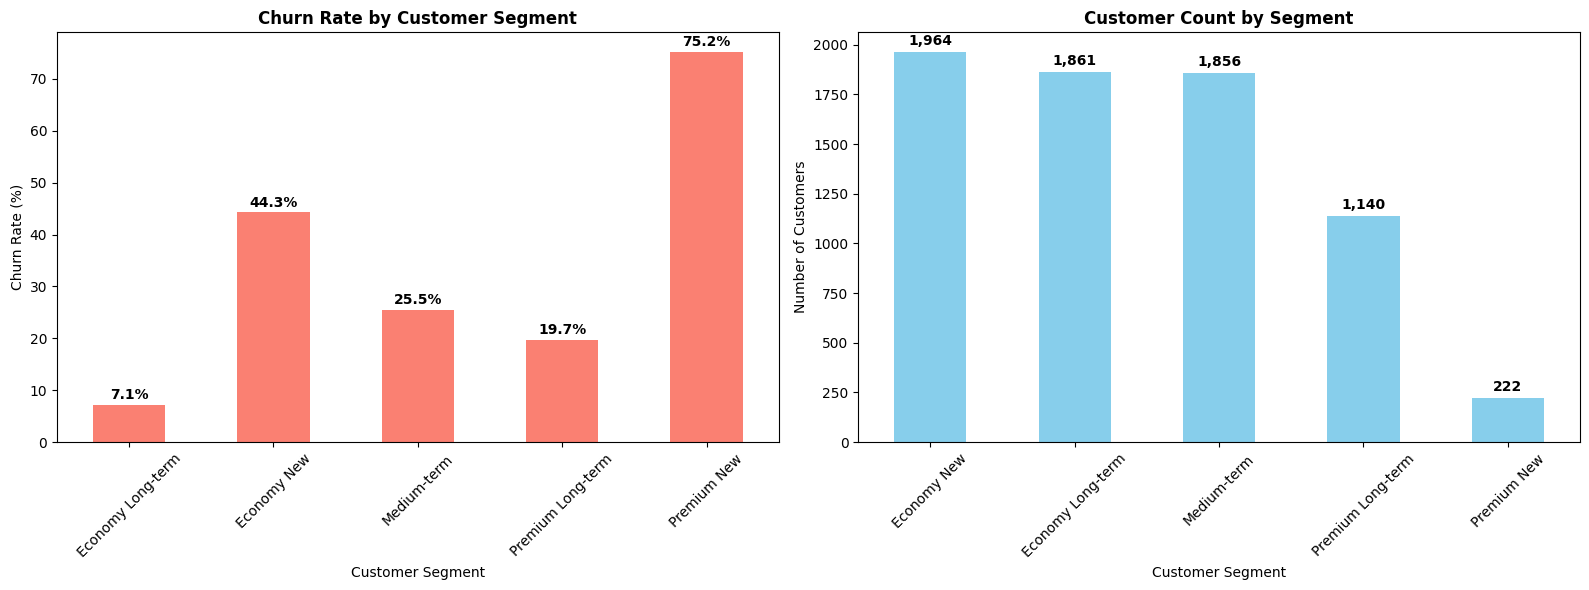

In [21]:
# Customer Segmentation Analysis
print("CUSTOMER SEGMENTATION ANALYSIS:")
print("="*60)

# Create customer segments based on multiple factors
def create_customer_segment(row):
    # High-value, long-term customers
    if row['HighValueCustomer'] == 1 and row['TenureCategory'] == 'Long-term (>3 years)':
        return 'Premium Long-term'
    # High-value, new customers
    elif row['HighValueCustomer'] == 1 and row['TenureCategory'] == 'New (≤1 year)':
        return 'Premium New'
    # Low charges, long-term
    elif row['HighValueCustomer'] == 0 and row['TenureCategory'] == 'Long-term (>3 years)':
        return 'Economy Long-term'
    # Low charges, new
    elif row['HighValueCustomer'] == 0 and row['TenureCategory'] == 'New (≤1 year)':
        return 'Economy New'
    # Medium tenure customers
    else:
        return 'Medium-term'

df_engineered['CustomerSegment'] = df_engineered.apply(create_customer_segment, axis=1)

# Analyze churn by customer segment
segment_analysis = df_engineered.groupby('CustomerSegment').agg({
    'Churn': ['count', lambda x: (x == 'Yes').sum(), lambda x: (x == 'Yes').mean() * 100],
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean',
    'tenure': 'mean'
}).round(2)

segment_analysis.columns = ['Total_Customers', 'Churned', 'Churn_Rate_%', 'Avg_Monthly_Charges', 'Avg_Total_Charges', 'Avg_Tenure']
print("Customer Segment Analysis:")
print(segment_analysis)

# Visualize segment analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Churn rate by segment
segment_churn_rate = df_engineered.groupby('CustomerSegment')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
segment_churn_rate.plot(kind='bar', ax=ax1, color='salmon')
ax1.set_title('Churn Rate by Customer Segment', fontweight='bold')
ax1.set_xlabel('Customer Segment')
ax1.set_ylabel('Churn Rate (%)')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(segment_churn_rate.values):
    ax1.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# Segment size
segment_counts = df_engineered['CustomerSegment'].value_counts()
segment_counts.plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Customer Count by Segment', fontweight='bold')
ax2.set_xlabel('Customer Segment')
ax2.set_ylabel('Number of Customers')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(segment_counts.values):
    ax2.text(i, v + 20, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


RISK PROFILE ANALYSIS:
RiskScore quantile edges (0%, 33%, 66%, 100%):
0.000000     5.0
0.333333    11.0
0.666667    17.0
1.000000    26.0
Risk Level Analysis:
             Total_Customers  Churned  Churn_Rate_%  Avg_Risk_Score
RiskLevel                                                          
Low Risk                2558      168          6.57            8.17
Medium Risk             2407      654         27.17           14.51
High Risk               2078     1047         50.38           20.41


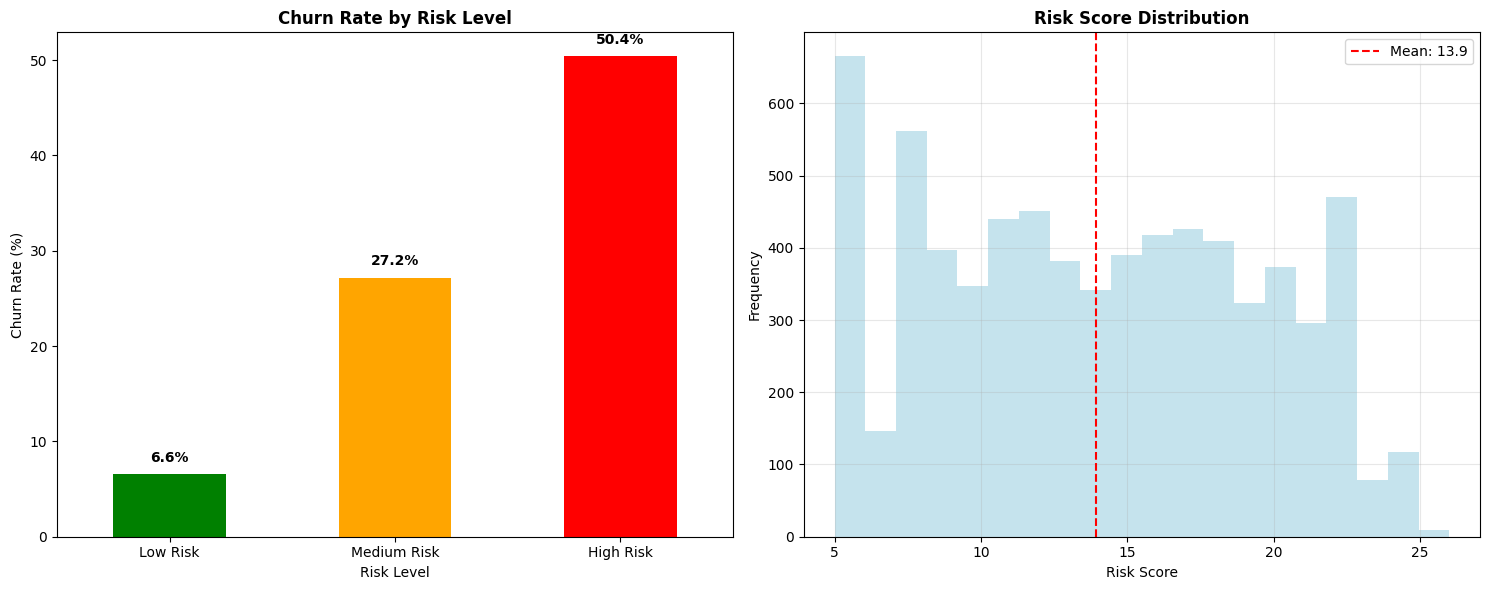


Risk Score Statistics:
Mean Risk Score: 13.95
Standard Deviation: 5.30
Min Risk Score: 5
Max Risk Score: 26


In [22]:
# Risk Profile Analysis
print("\nRISK PROFILE ANALYSIS:")
print("="*50)

# Create risk score based on multiple factors
def calculate_risk_score(row):
    score = 0
    
    # Contract risk (higher weight)
    score += row['ContractRisk'] * 3
    
    # Payment risk
    score += row['PaymentRisk'] * 2
    
    # Tenure risk (inverse - shorter tenure = higher risk)
    if row['tenure'] <= 6:
        score += 5
    elif row['tenure'] <= 12:
        score += 3
    elif row['tenure'] <= 24:
        score += 1
    
    # Service count risk (fewer services = higher risk)
    if row['TotalServices'] <= 1:
        score += 3
    elif row['TotalServices'] <= 3:
        score += 1
    
    # Senior citizen risk
    if row['SeniorCitizen'] == 1:
        score += 2
    
    # No family support risk
    if row['HasFamily'] == 0:
        score += 1
    
    return score

df_engineered['RiskScore'] = df_engineered.apply(calculate_risk_score, axis=1)

# Categorize risk levels using equal-frequency quantile buckets (tertiles)
risk_labels = ['Low Risk', 'Medium Risk', 'High Risk']
df_engineered['RiskLevel'] = pd.qcut(
    df_engineered['RiskScore'],
    q=3,
    labels=risk_labels,
    duplicates='drop'
)

# print quantile edges for transparency
quantile_edges = df_engineered['RiskScore'].quantile([0, 1/3, 2/3, 1]).round(2)
print("RiskScore quantile edges (0%, 33%, 66%, 100%):")
print(quantile_edges.to_string())

# Analyze churn by risk level
risk_analysis = df_engineered.groupby('RiskLevel').agg({
    'Churn': ['count', lambda x: (x == 'Yes').sum(), lambda x: (x == 'Yes').mean() * 100],
    'RiskScore': 'mean'
}).round(2)

risk_analysis.columns = ['Total_Customers', 'Churned', 'Churn_Rate_%', 'Avg_Risk_Score']
print("Risk Level Analysis:")
print(risk_analysis)

# Visualize risk analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Churn rate by risk level
risk_churn_rate = df_engineered.groupby('RiskLevel')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
risk_order = ['Low Risk', 'Medium Risk', 'High Risk']
risk_churn_rate = risk_churn_rate.reindex(risk_order)
risk_churn_rate.plot(kind='bar', ax=ax1, color=['green', 'orange', 'red'])
ax1.set_title('Churn Rate by Risk Level', fontweight='bold')
ax1.set_xlabel('Risk Level')
ax1.set_ylabel('Churn Rate (%)')
ax1.tick_params(axis='x', rotation=0)

# Add value labels
for i, v in enumerate(risk_churn_rate.values):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# Risk score distribution
df_engineered['RiskScore'].hist(bins=20, ax=ax2, color='lightblue', alpha=0.7)
ax2.axvline(df_engineered['RiskScore'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df_engineered["RiskScore"].mean():.1f}')
ax2.set_title('Risk Score Distribution', fontweight='bold')
ax2.set_xlabel('Risk Score')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nRisk Score Statistics:")
print(f"Mean Risk Score: {df_engineered['RiskScore'].mean():.2f}")
print(f"Standard Deviation: {df_engineered['RiskScore'].std():.2f}")
print(f"Min Risk Score: {df_engineered['RiskScore'].min()}")
print(f"Max Risk Score: {df_engineered['RiskScore'].max()}")

## 9. Key Insights and Business Recommendations

In [23]:
# Summary of Key Insights
print("KEY INSIGHTS FROM TELCO CUSTOMER CHURN ANALYSIS")
print("="*80)

# Calculate key metrics for insights
total_customers = len(df_engineered)
total_churned = len(df_engineered[df_engineered['Churn'] == 'Yes'])
churn_rate = (total_churned / total_customers) * 100

print(f"\nOVERALL METRICS:")
print(f"Total Customers: {total_customers:,}")
print(f"Churned Customers: {total_churned:,}")
print(f"Overall Churn Rate: {churn_rate:.2f}%")

print(f"\n🎯 TOP CHURN RISK FACTORS:")

# Contract type impact
contract_churn = df_engineered.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"Month-to-month contracts: {contract_churn['Month-to-month']:.1f}% churn rate")
print(f"One year contracts: {contract_churn['One year']:.1f}% churn rate") 
print(f"Two year contracts: {contract_churn['Two year']:.1f}% churn rate")

# Payment method impact
payment_churn = df_engineered.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
highest_payment_churn = payment_churn.max()
highest_payment_method = payment_churn.idxmax()
print(f"{highest_payment_method}: {highest_payment_churn:.1f}% churn rate (highest)")

# Tenure impact
new_customer_churn = df_engineered[df_engineered['TenureCategory'] == 'New (≤1 year)']['Churn'].apply(lambda x: x == 'Yes').mean() * 100
print(f"New customers (≤1 year): {new_customer_churn:.1f}% churn rate")

# Internet service impact
internet_churn = df_engineered.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"Fiber optic users: {internet_churn['Fiber optic']:.1f}% churn rate")
print(f"DSL users: {internet_churn['DSL']:.1f}% churn rate")

print(f"\nFINANCIAL INSIGHTS:")
avg_monthly_churned = df_engineered[df_engineered['Churn'] == 'Yes']['MonthlyCharges'].mean()
avg_monthly_stayed = df_engineered[df_engineered['Churn'] == 'No']['MonthlyCharges'].mean()
print(f"Churned customers avg monthly charges: ${avg_monthly_churned:.2f}")
print(f"Retained customers avg monthly charges: ${avg_monthly_stayed:.2f}")
print(f"Difference: ${avg_monthly_churned - avg_monthly_stayed:.2f} (churned pay more)")

# Calculate potential revenue loss
monthly_revenue_loss = total_churned * avg_monthly_churned
annual_revenue_loss = monthly_revenue_loss * 12
print(f"Estimated monthly revenue loss: ${monthly_revenue_loss:,.0f}")
print(f"Estimated annual revenue loss: ${annual_revenue_loss:,.0f}")

print(f"\nCUSTOMER DEMOGRAPHICS:")
senior_churn = df_engineered.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"Senior citizens churn rate: {senior_churn[1]:.1f}%")
print(f"Non-senior citizens churn rate: {senior_churn[0]:.1f}%")

no_family_churn = df_engineered[df_engineered['HasFamily'] == 0]['Churn'].apply(lambda x: x == 'Yes').mean() * 100
print(f"Customers without family support: {no_family_churn:.1f}% churn rate")

print(f"\nSERVICE-RELATED INSIGHTS:")
# Customers with no additional services
basic_service_churn = df_engineered[df_engineered['TotalServices'] <= 1]['Churn'].apply(lambda x: x == 'Yes').mean() * 100
print(f"Customers with ≤1 service: {basic_service_churn:.1f}% churn rate")

# Security services impact
no_security_churn = df_engineered[df_engineered['OnlineSecurity'] == 'No']['Churn'].apply(lambda x: x == 'Yes').mean() * 100
print(f"Customers without online security: {no_security_churn:.1f}% churn rate")

print(f"\nHIGH-RISK SEGMENTS:")
high_risk_customers = len(df_engineered[df_engineered['RiskLevel'] == 'High Risk'])
high_risk_churn_rate = df_engineered[df_engineered['RiskLevel'] == 'High Risk']['Churn'].apply(lambda x: x == 'Yes').mean() * 100
print(f"High-risk customers: {high_risk_customers:,} ({high_risk_customers/total_customers*100:.1f}% of total)")
print(f"High-risk churn rate: {high_risk_churn_rate:.1f}%")

# Premium new customers (high value but new)
premium_new = df_engineered[df_engineered['CustomerSegment'] == 'Premium New']
if len(premium_new) > 0:
    premium_new_churn = premium_new['Churn'].apply(lambda x: x == 'Yes').mean() * 100
    print(f"Premium new customers churn rate: {premium_new_churn:.1f}%")

KEY INSIGHTS FROM TELCO CUSTOMER CHURN ANALYSIS

OVERALL METRICS:
Total Customers: 7,043
Churned Customers: 1,869
Overall Churn Rate: 26.54%

🎯 TOP CHURN RISK FACTORS:
Month-to-month contracts: 42.7% churn rate
One year contracts: 11.3% churn rate
Two year contracts: 2.8% churn rate
Electronic check: 45.3% churn rate (highest)
New customers (≤1 year): 47.4% churn rate
Fiber optic users: 41.9% churn rate
DSL users: 19.0% churn rate

FINANCIAL INSIGHTS:
Churned customers avg monthly charges: $74.44
Retained customers avg monthly charges: $61.27
Difference: $13.18 (churned pay more)
Estimated monthly revenue loss: $139,131
Estimated annual revenue loss: $1,669,570

CUSTOMER DEMOGRAPHICS:
Senior citizens churn rate: 41.7%
Non-senior citizens churn rate: 23.6%
Customers without family support: 34.2% churn rate

SERVICE-RELATED INSIGHTS:
Customers with ≤1 service: 9.2% churn rate
Customers without online security: 41.8% churn rate

HIGH-RISK SEGMENTS:
High-risk customers: 2,078 (29.5% of tot

## 10. Principal Component Analysis (PCA) and Lasso

Principal Component Analysis and Lasso will help us:
- Reduce dimensionality of the dataset
- Identify the most important features that explain variance
- Visualize data in lower dimensions
- Understand feature relationships

In [24]:
# Prepare data for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("PRINCIPAL COMPONENT ANALYSIS")
print("="*60)

# Create a copy of the engineered dataset for PCA
df_pca = df_engineered.copy()

# Remove non-numeric columns and ID columns
columns_to_exclude = ['customerID']
if 'MonthlyCharges_Segment' in df_pca.columns:
    columns_to_exclude.append('MonthlyCharges_Segment')
if 'TenureCategory' in df_pca.columns:
    columns_to_exclude.append('TenureCategory')
if 'CustomerSegment' in df_pca.columns:
    columns_to_exclude.append('CustomerSegment')
if 'RiskLevel' in df_pca.columns:
    columns_to_exclude.append('RiskLevel')

print(f"Excluding columns: {columns_to_exclude}")

# Encode remaining categorical variables
pca_encoders = {}
categorical_cols = df_pca.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col not in columns_to_exclude:
        le = LabelEncoder()
        df_pca[col] = le.fit_transform(df_pca[col])
        pca_encoders[col] = le

# Drop excluded columns
df_pca_numeric = df_pca.drop(columns_to_exclude, axis=1)

print(f"Dataset shape for PCA: {df_pca_numeric.shape}")
print(f"Features included: {list(df_pca_numeric.columns)}")

# Separate features and target
X = df_pca_numeric.drop('Churn', axis=1)
y = df_pca_numeric['Churn']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data standardized for PCA")
print(f"Mean of scaled features: {X_scaled.mean():.6f}")
print(f"Std of scaled features: {X_scaled.std():.6f}")

PRINCIPAL COMPONENT ANALYSIS
Excluding columns: ['customerID', 'MonthlyCharges_Segment', 'TenureCategory', 'CustomerSegment', 'RiskLevel']
Dataset shape for PCA: (7043, 28)
Features included: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'EstimatedCLV', 'AvgChargesPerMonth', 'TotalServices', 'HasFamily', 'HighValueCustomer', 'ContractRisk', 'PaymentRisk', 'RiskScore']
Feature matrix shape: (7043, 27)
Target vector shape: (7043,)
Data standardized for PCA
Mean of scaled features: 0.000000
Std of scaled features: 1.000000



PERFORMING PCA ANALYSIS:
Number of components for 85% variance: 12
Number of components for 90% variance: 14
Number of components for 95% variance: 17
Total original features: 27


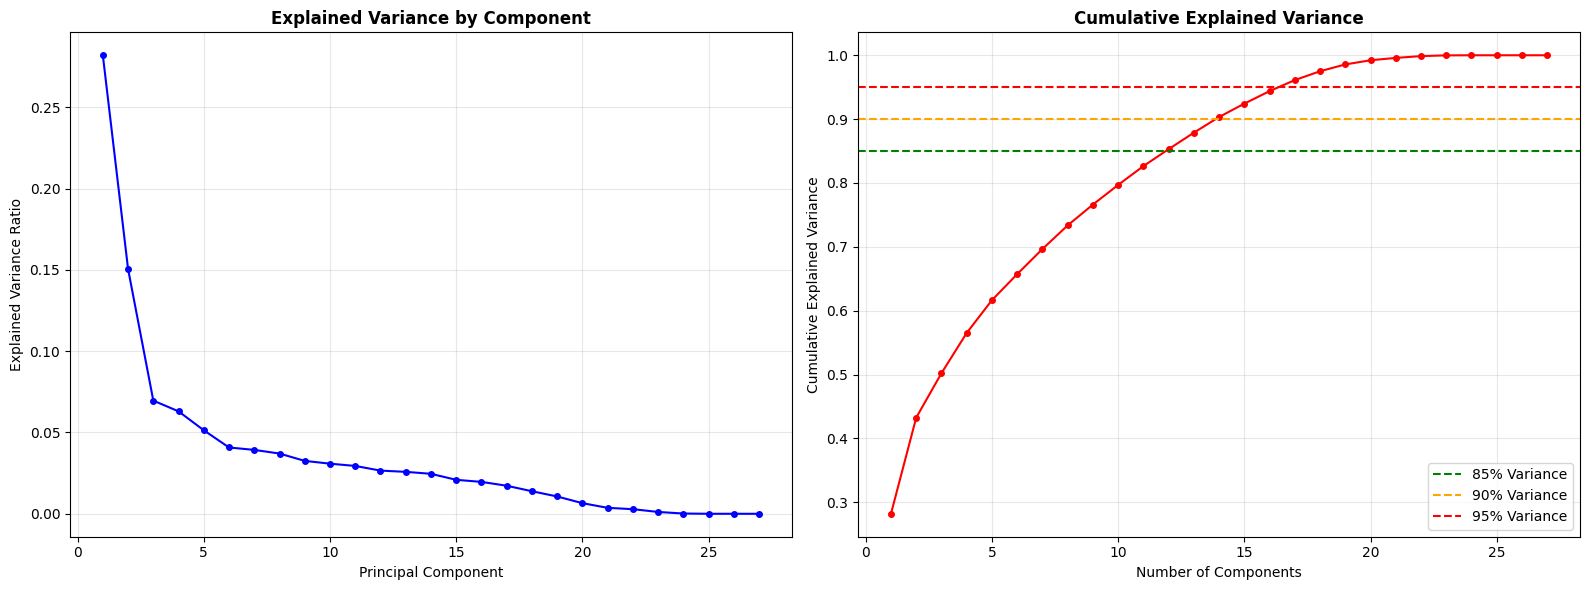


VARIANCE EXPLANATION:
First 5 components explain: 61.65% of variance
First 10 components explain: 79.69% of variance
First 15 components explain: 92.42% of variance
First 12 components explain: 85.29% of variance
First 14 components explain: 90.33% of variance
First 17 components explain: 96.11% of variance


In [25]:
# Perform PCA
print("\nPERFORMING PCA ANALYSIS:")
print("="*50)

# how many components we need to explain most of the variance
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1

print(f"Number of components for 85% variance: {n_components_85}")
print(f"Number of components for 90% variance: {n_components_90}")
print(f"Number of components for 95% variance: {n_components_95}")
print(f"Total original features: {X.shape[1]}")

# Fit optimal PCA for feature importance (using n_components_90 for 90% variance)
pca_optimal = PCA(n_components=n_components_90)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Individual explained variance
ax1.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_, 'bo-', markersize=4)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Component', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', markersize=4)
ax2.axhline(y=0.85, color='green', linestyle='--', label='85% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
ax2.axhline(y=0.95, color='red', linestyle='--', label='95% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVARIANCE EXPLANATION:")
for i in [5, 10, 15, n_components_85, n_components_90, n_components_95]:
    if i <= len(cumulative_variance):
        print(f"First {i} components explain: {cumulative_variance[i-1]*100:.2f}% of variance")


VISUALIZING DATA IN PCA SPACE:
2D PCA explains 43.25% of variance
3D PCA explains 50.21% of variance


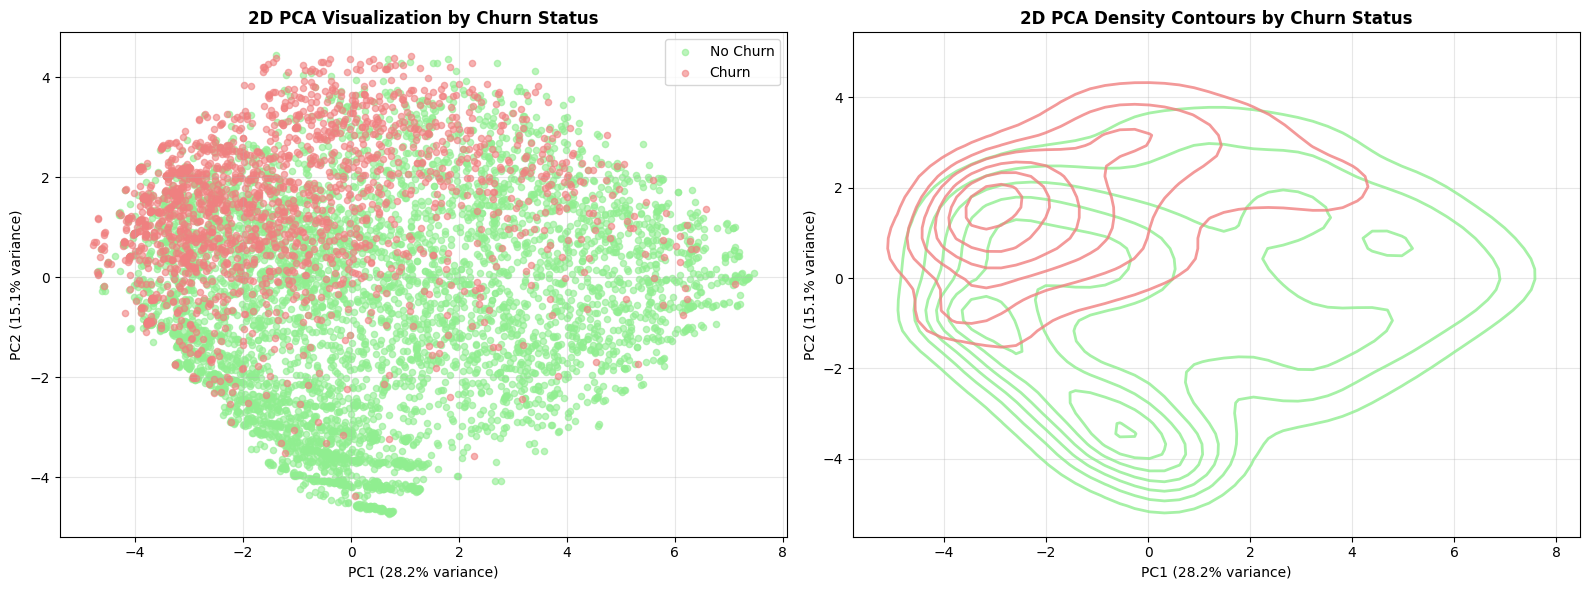


PCA COMPONENTS ANALYSIS BY CHURN:
                PC1                                                      PC2  \
              count   mean    std    min    25%    50%    75%    max   count   
Churn_Label                                                                    
No           5174.0  0.418  2.786 -4.692 -1.798 -0.016  2.473  7.465  5174.0   
Yes          1869.0 -1.157  2.322 -4.787 -3.027 -1.646  0.194  7.115  1869.0   

                                                              
              mean    std    min    25%    50%    75%    max  
Churn_Label                                                   
No          -0.510  1.956 -4.728 -1.957 -0.445  0.958  4.440  
Yes          1.413  1.415 -4.364  0.549  1.510  2.391  4.431  


In [26]:
# Visualize data in PCA space
print("\nVISUALIZING DATA IN PCA SPACE:")
print("="*50)

# Create PCA with 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create PCA with 3 components for 3D visualization  
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"2D PCA explains {pca_2d.explained_variance_ratio_.sum()*100:.2f}% of variance")
print(f"3D PCA explains {pca_3d.explained_variance_ratio_.sum()*100:.2f}% of variance")

# 2D PCA visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot colored by churn
for churn_val, color, label in [(0, 'lightgreen', 'No Churn'), (1, 'lightcoral', 'Churn')]:
    mask = y == churn_val
    axes[0].scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
                   c=color, alpha=0.6, label=label, s=20)

axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[0].set_title('2D PCA Visualization by Churn Status', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Density plot
from scipy.stats import gaussian_kde

# Calculate density for each churn group
for churn_val, color, label in [(0, 'lightgreen', 'No Churn'), (1, 'lightcoral', 'Churn')]:
    mask = y == churn_val
    if np.sum(mask) > 10:  # Only if we have enough points
        kde = gaussian_kde(X_pca_2d[mask].T)
        
        # Create grid for contour plot
        x_min, x_max = X_pca_2d[:, 0].min() - 1, X_pca_2d[:, 0].max() + 1
        y_min, y_max = X_pca_2d[:, 1].min() - 1, X_pca_2d[:, 1].max() + 1
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                            np.linspace(y_min, y_max, 50))
        
        positions = np.vstack([xx.ravel(), yy.ravel()])
        density = kde(positions).reshape(xx.shape)
        
        axes[1].contour(xx, yy, density, colors=color, alpha=0.8, linewidths=2)

axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[1].set_title('2D PCA Density Contours by Churn Status', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a DataFrame with PCA results for analysis
pca_results_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_results_df['Churn'] = y
pca_results_df['Churn_Label'] = pca_results_df['Churn'].map({0: 'No', 1: 'Yes'})

# Statistical summary of PCA components by churn
print(f"\nPCA COMPONENTS ANALYSIS BY CHURN:")
pca_stats = pca_results_df.groupby('Churn_Label')[['PC1', 'PC2']].describe()
print(pca_stats.round(3))


PCA FEATURE IMPORTANCE ANALYSIS:
TOP 15 MOST IMPORTANT FEATURES (PCA-based):
------------------------------------------------------------
 1. RiskScore            | Importance: 0.1240
 2. MonthlyCharges       | Importance: 0.1189
 3. AvgChargesPerMonth   | Importance: 0.1187
 4. ContractRisk         | Importance: 0.1179
 5. Contract             | Importance: 0.1179
 6. TotalServices        | Importance: 0.1159
 7. TotalCharges         | Importance: 0.1093
 8. EstimatedCLV         | Importance: 0.1093
 9. HasFamily            | Importance: 0.1075
10. tenure               | Importance: 0.1074
11. Partner              | Importance: 0.1041
12. HighValueCustomer    | Importance: 0.1017
13. PaymentRisk          | Importance: 0.0843
14. Dependents           | Importance: 0.0827
15. TechSupport          | Importance: 0.0759


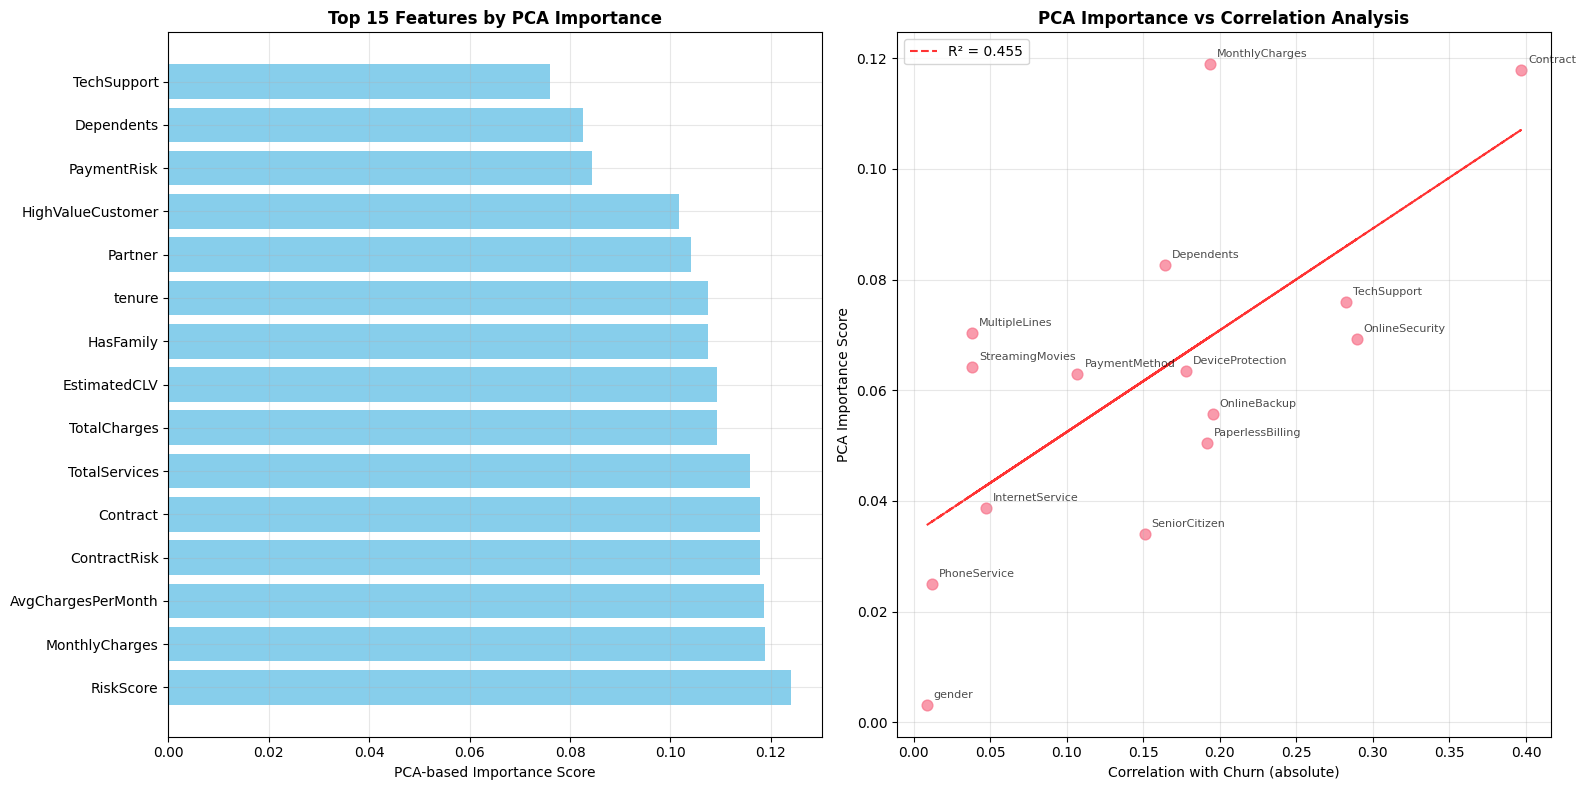


PCA INSIGHTS:
Dimensionality reduced from 27 to 14 features
14 components explain 90.3% of variance


In [27]:
# PCA Feature Importance and Interpretation
print("\nPCA FEATURE IMPORTANCE ANALYSIS:")
print("="*60)

# Create a DataFrame of PCA components (loadings)
components_df = pd.DataFrame(
    pca_optimal.components_.T,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(pca_optimal.n_components_)]
)

# Calculate feature importance based on PCA loadings
# Features with high absolute loadings in early components are more important
feature_importance_pca = pd.DataFrame({
    'Feature': components_df.index,
    'PC1_Loading': np.abs(components_df['PC1']),
    'PC2_Loading': np.abs(components_df['PC2']),
    'PC3_Loading': np.abs(components_df['PC3']) if 'PC3' in components_df.columns else 0
})

# Calculate weighted importance (weight by explained variance)
pc1_weight = pca_optimal.explained_variance_ratio_[0]
pc2_weight = pca_optimal.explained_variance_ratio_[1]
pc3_weight = pca_optimal.explained_variance_ratio_[2] if len(pca_optimal.explained_variance_ratio_) > 2 else 0

feature_importance_pca['Weighted_Importance'] = (
    feature_importance_pca['PC1_Loading'] * pc1_weight +
    feature_importance_pca['PC2_Loading'] * pc2_weight +
    feature_importance_pca['PC3_Loading'] * pc3_weight
)

# Sort by importance
feature_importance_pca = feature_importance_pca.sort_values('Weighted_Importance', ascending=False)

print("TOP 15 MOST IMPORTANT FEATURES (PCA-based):")
print("-" * 60)
for i, (_, row) in enumerate(feature_importance_pca.head(15).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<20} | Importance: {row['Weighted_Importance']:.4f}")

# Visualize feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 features by PCA importance
top_15_features = feature_importance_pca.head(15)
ax1.barh(range(len(top_15_features)), top_15_features['Weighted_Importance'], color='skyblue')
ax1.set_yticks(range(len(top_15_features)))
ax1.set_yticklabels(top_15_features['Feature'])
ax1.set_xlabel('PCA-based Importance Score')
ax1.set_title('Top 15 Features by PCA Importance', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Compare with correlation-based importance (from earlier analysis)
if 'correlation_matrix' in globals():
    churn_corr_abs = correlation_matrix['Churn'].abs().sort_values(ascending=False)
    churn_corr_abs = churn_corr_abs[churn_corr_abs.index != 'Churn']
    
    # Get common features for comparison
    common_features = set(feature_importance_pca['Feature']) & set(churn_corr_abs.index)
    
    pca_scores = []
    corr_scores = []
    labels = []
    
    for feature in list(common_features)[:15]:
        pca_score = feature_importance_pca[feature_importance_pca['Feature'] == feature]['Weighted_Importance'].iloc[0]
        corr_score = churn_corr_abs[feature]
        
        pca_scores.append(pca_score)
        corr_scores.append(corr_score)
        labels.append(feature)
    
    ax2.scatter(corr_scores, pca_scores, alpha=0.7, s=60)
    
    for i, label in enumerate(labels):
        ax2.annotate(label, (corr_scores[i], pca_scores[i]), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=8, alpha=0.7)
    
    ax2.set_xlabel('Correlation with Churn (absolute)')
    ax2.set_ylabel('PCA Importance Score')
    ax2.set_title('PCA Importance vs Correlation Analysis', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Add trend line
    from scipy import stats as scipy_stats
    slope, intercept, r_value, p_value, std_err = scipy_stats.linregress(corr_scores, pca_scores)
    line = slope * np.array(corr_scores) + intercept
    ax2.plot(corr_scores, line, 'r--', alpha=0.8, 
             label=f'R² = {r_value**2:.3f}')
    ax2.legend()

plt.tight_layout()
plt.show()

print(f"\nPCA INSIGHTS:")
print(f"Dimensionality reduced from {X.shape[1]} to {n_components_90} features")
print(f"{n_components_90} components explain {pca_optimal.explained_variance_ratio_.sum()*100:.1f}% of variance")



LASSO FEATURE IMPORTANCE ANALYSIS

Optimal alpha (regularization strength): 0.000323
R² score with optimal alpha: 0.2995

TOP 20 FEATURES BY LASSO IMPORTANCE:
--------------------------------------------------------------------------------
           Feature  Coefficient  Abs_Coefficient  Importance_Pct  Cumulative_Pct
         RiskScore     0.255236         0.255236       24.454673       24.454673
    MonthlyCharges     0.190654         0.190654       18.267020       42.721693
      EstimatedCLV    -0.130238         0.130238       12.478419       55.200112
            tenure     0.069374         0.069374        6.646918       61.847030
      ContractRisk    -0.059846         0.059846        5.734001       67.581031
       PaymentRisk    -0.042857         0.042857        4.106237       71.687268
      PhoneService    -0.039494         0.039494        3.784029       75.471297
AvgChargesPerMonth     0.029583         0.029583        2.834393       78.305689
       TechSupport    -0.0285

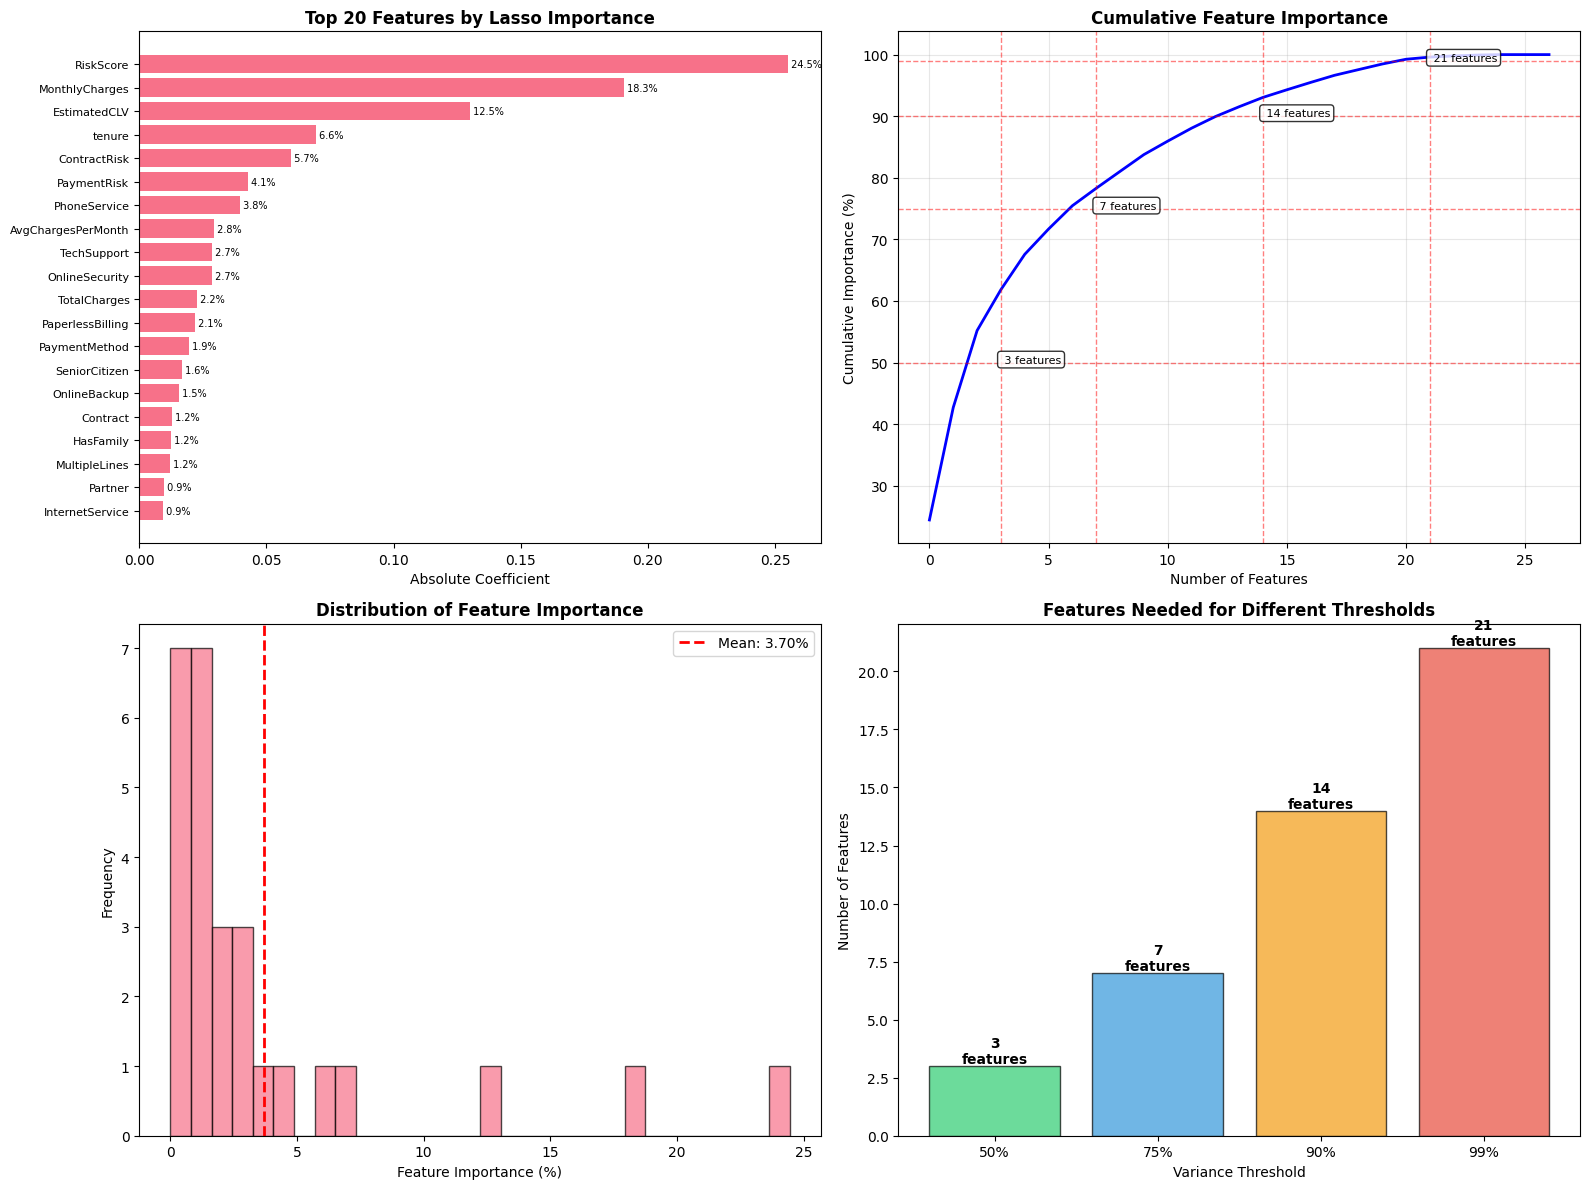


LASSO FEATURE IMPORTANCE ANALYSIS COMPLETE


In [28]:
# Lasso-based Feature Importance and Variance Analysis
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd

print("\n\nLASSO FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Use LassoCV to find optimal alpha with cross-validation
lasso_cv = LassoCV(cv=5, random_state=RANDOM_SEED, max_iter=10000, n_jobs=-1)
lasso_cv.fit(X_scaled, y)

print(f"\nOptimal alpha (regularization strength): {lasso_cv.alpha_:.6f}")
print(f"R² score with optimal alpha: {lasso_cv.score(X_scaled, y):.4f}")

# Get feature coefficients from Lasso
lasso_coefs = np.abs(lasso_cv.coef_)

# Create feature importance dataframe
lasso_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_cv.coef_,
    'Abs_Coefficient': lasso_coefs
}).sort_values('Abs_Coefficient', ascending=False)

# Calculate cumulative importance as percentage of total
total_importance = lasso_importance['Abs_Coefficient'].sum()
lasso_importance['Importance_Pct'] = (lasso_importance['Abs_Coefficient'] / total_importance) * 100
lasso_importance['Cumulative_Pct'] = lasso_importance['Importance_Pct'].cumsum()

print(f"\nTOP 20 FEATURES BY LASSO IMPORTANCE:")
print("-" * 80)
print(lasso_importance.head(20).to_string(index=False))

# Find features that capture different variance thresholds
thresholds = [50, 75, 90, 99]
threshold_features = {}

for threshold in thresholds:
    features_needed = lasso_importance[lasso_importance['Cumulative_Pct'] <= threshold]
    if len(features_needed) < len(lasso_importance):
        # Add one more feature to exceed the threshold
        features_needed = lasso_importance.iloc[:len(features_needed) + 1]
    threshold_features[threshold] = features_needed['Feature'].tolist()

print(f"\n\nFEATURES CAPTURING DIFFERENT VARIANCE THRESHOLDS:")
print("="*80)

for threshold in thresholds:
    features = threshold_features[threshold]
    actual_pct = lasso_importance[lasso_importance['Feature'].isin(features)]['Importance_Pct'].sum()
    
    print(f"\n{threshold}% Threshold:")
    print(f"   Number of features needed: {len(features)}")
    print(f"   Actual cumulative importance: {actual_pct:.2f}%")
    print(f"   Features: {features}")

# Additional statistics
non_zero_features = lasso_importance[lasso_importance['Abs_Coefficient'] > 0]
zero_features = lasso_importance[lasso_importance['Abs_Coefficient'] == 0]

print(f"\n\nLASSO REGULARIZATION SUMMARY:")
print("="*80)
print(f"   Total features: {len(X.columns)}")
print(f"   Non-zero coefficients: {len(non_zero_features)} ({len(non_zero_features)/len(X.columns)*100:.1f}%)")
print(f"   Zero coefficients (eliminated): {len(zero_features)} ({len(zero_features)/len(X.columns)*100:.1f}%)")
print(f"\n   Top feature: {lasso_importance.iloc[0]['Feature']}")
print(f"   Top feature importance: {lasso_importance.iloc[0]['Importance_Pct']:.2f}%")

# Visualize feature importance
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 20 features
ax1 = axes[0, 0]
top_20 = lasso_importance.head(20)
bars = ax1.barh(range(len(top_20)), top_20['Abs_Coefficient'])
ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels(top_20['Feature'], fontsize=8)
ax1.set_xlabel('Absolute Coefficient', fontsize=10)
ax1.set_title('Top 20 Features by Lasso Importance', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
for i, (idx, row) in enumerate(top_20.iterrows()):
    ax1.text(row['Abs_Coefficient'], i, f" {row['Importance_Pct']:.1f}%", 
             va='center', fontsize=7)

# Cumulative importance
ax2 = axes[0, 1]
ax2.plot(range(len(lasso_importance)), lasso_importance['Cumulative_Pct'], 
         linewidth=2, color='blue')
for threshold in thresholds:
    n_features = len(threshold_features[threshold])
    ax2.axhline(y=threshold, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax2.axvline(x=n_features, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax2.text(n_features, threshold, f' {n_features} features', fontsize=8, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax2.set_xlabel('Number of Features', fontsize=10)
ax2.set_ylabel('Cumulative Importance (%)', fontsize=10)
ax2.set_title('Cumulative Feature Importance', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Feature importance distribution
ax3 = axes[1, 0]
ax3.hist(lasso_importance['Importance_Pct'], bins=30, edgecolor='black', alpha=0.7)
ax3.set_xlabel('Feature Importance (%)', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.set_title('Distribution of Feature Importance', fontsize=12, fontweight='bold')
ax3.axvline(x=lasso_importance['Importance_Pct'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f"Mean: {lasso_importance['Importance_Pct'].mean():.2f}%")
ax3.legend()

# Threshold comparison
ax4 = axes[1, 1]
threshold_counts = [len(threshold_features[t]) for t in thresholds]
bars = ax4.bar([f'{t}%' for t in thresholds], threshold_counts, 
               color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'], alpha=0.7, edgecolor='black')
ax4.set_ylabel('Number of Features', fontsize=10)
ax4.set_xlabel('Variance Threshold', fontsize=10)
ax4.set_title('Features Needed for Different Thresholds', fontsize=12, fontweight='bold')
for i, (bar, count) in enumerate(zip(bars, threshold_counts)):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{count}\nfeatures', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nLASSO FEATURE IMPORTANCE ANALYSIS COMPLETE")


## 11. Kernel PCA

In [29]:
# Kernel PCA on the same data as PCA (with error handling for singular matrix)
from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd

# X is the same feature matrix used for PCA (already preprocessed, no target column)
# Define kernels to try (excluding linear, which is just PCA)
kernels = ['rbf', 'sigmoid']
# Use a safer number of components for KernelPCA
max_components = min(X.shape[0], X.shape[1], 10)  # limit to 10 or less for stability
n_components_kpca = min(n_components_90, max_components)

kernel_results = {}
for kernel in kernels:
    try:
        kpca = KernelPCA(n_components=n_components_kpca, kernel=kernel, fit_inverse_transform=True, random_state=42)
        X_kpca = kpca.fit_transform(X)
        # use dual_coef_ as proxy for feature importance if available
        if hasattr(kpca, 'dual_coef_') and kpca.dual_coef_ is not None:
            feature_scores = pd.Series(np.abs(kpca.dual_coef_).mean(axis=0), index=X.columns)
        else:
            # Fallback: use variance in transformed space
            feature_scores = pd.Series(np.var(X_kpca, axis=0), index=[f'PC{i+1}' for i in range(n_components_kpca)])
        top_features = feature_scores.sort_values(ascending=False).head(5)
        kernel_results[kernel] = top_features
    except Exception as e:
        print(f"Kernel PCA failed for kernel '{kernel}': {e}")

# Display results
for kernel, top_features in kernel_results.items():
    print(f"\nKernel: {kernel}")
    print("Top features by loading/importance:")
    for feature, score in top_features.items():
        print(f"{feature}: {score:.4f}")


Kernel: rbf
Top features by loading/importance:
TotalCharges: 1801.1403
EstimatedCLV: 1799.5946
AvgChargesPerMonth: 24.5322
MonthlyCharges: 24.5009
tenure: 20.1722

Kernel: sigmoid
Top features by loading/importance:
TotalCharges: 1899.0298
EstimatedCLV: 1897.6141
AvgChargesPerMonth: 26.2547
MonthlyCharges: 26.2235
tenure: 21.8727


In [30]:
# Save the final engineered dataset to CSV
df_engineered.to_csv('final_telco_engineered.csv', index=False)
print("Final engineered dataset saved as 'final_telco_engineered.csv'.")

Final engineered dataset saved as 'final_telco_engineered.csv'.
